# INFO-F-422 - Statistical foundations of machine learning - 2023-2024

## Zindi competition - Urban Air Pollution Challenge


## Urban Air Pollution Challenge

According to the [challenge presentation](https://zindi.africa/competitions/zindiweekendz-learning-urban-air-pollution-challenge), the objective here is to predict PM2.5 particulate matter concentration in the air every day for each city. PM2.5 refers to atmospheric particulate matter that has a diameter of fewer than 2.5 micrometres and is one of the most harmful air pollutants. PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure.


## 0. Configuration

In [40]:
SEED <- 42
set.seed(SEED)
options(repr.matrix.max.cols = 100)


In [41]:
ROOT_PATH <- "./"
DATA_PATH <- paste(ROOT_PATH, "data/", sep = "")
TRAIN_PATH <- paste(DATA_PATH, "Train.csv", sep = "")
TEST_PATH <- paste(DATA_PATH, "Test.csv", sep = "")
RESULTS_PATH <- paste(ROOT_PATH, "results/", sep = "")
FEATURE_SELECTION_PATH <- paste(RESULTS_PATH, "feature_selection.csv", sep = "")
GRID_SEARCH_RF_PATH <- paste(RESULTS_PATH, "grid_search_rf.csv", sep = "")
GRID_SEARCH_SVM_PATH <- paste(RESULTS_PATH, "grid_search_svm.csv", sep = "")
GRID_SEARCH_MLP_PATH <- paste(RESULTS_PATH, "grid_search_mlp.csv", sep = "")
GRID_SEARCH_XGBOOST_PATH <- paste(RESULTS_PATH, "grid_search_xgboost.csv", sep = "")
CV_MODEL_PATH <- paste(RESULTS_PATH, "cv_model.csv", sep = "")
CV_BEST_MODEL_PATH <- paste(RESULTS_PATH, "cv_best_model.csv", sep = "")
MODELS_PATH <- paste(ROOT_PATH, "models/", sep = "")
MODEL_PATH <- paste(paste(MODELS_PATH, "model.model", sep = ""))
BEST_MODEL_PATH <- paste(MODELS_PATH, "xgboost_model.model", sep = "")
SUBMISSIONS_PATH <- paste(ROOT_PATH, "submissions/", sep = "")
SUBMISSION_PATH <- paste(SUBMISSIONS_PATH, "submission.csv", sep = "")
RANKED_FEATURES_PATH <- paste(RESULTS_PATH, "ranked_features.csv", sep = "")


In [24]:
install.packages("tidyverse")
install.packages("data.table")
install.packages("ggplot2")
install.packages("GGally")
install.packages("mltools")
install.packages("lubridate")
install.packages("corrplot")
install.packages("RSNNS")
install.packages("mRMRe")
install.packages("glmnet")
install.packages("caret")
install.packages("xgboost")
install.packages("randomForest")
install.packages("e1071")


Warning message:
"le package 'tidyverse' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'data.table' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'ggplot2' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'GGally' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'mltools' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'lubridate' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'corrplot' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'RSNNS' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'mRMRe' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'glmnet' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'caret' est en cours d'utilisation et ne sera pas installé"

In [42]:
library(tidyverse)
library(data.table)
library(ggplot2)
library(GGally)
library(mltools)
library(lubridate)
library(corrplot)
library(mRMRe)
library(glmnet)
library(RSNNS)
library(xgboost)
library(caret)
library(randomForest)
library(e1071)


## 1. Data preprocessing pipeline

### 1.1 Data analysis

#### 1.1.1 Load data

In [43]:
load_data <- function(path) {
    return(read.csv(path, stringsAsFactors = T))
}


We will first look at the train dataset to see what are the features, the dimensions and print a summary of the set

In [44]:
train <- load_data(TRAIN_PATH)
head(train)
dim(train)


,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,0.006506796,840209.9,76.53751,38.6342842,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.5930174,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.622451,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.5930174,-61.75259,22.36366,6.388800e-05,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.5930174,-61.75259,22.36366,NA,-1.2313300,840209.9,76.53751,38.6342842,-61.73672,22.35817,-1.268545e-04,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,0.018360030,840772.9,-14.70804,59.6249116,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.402626,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,5

[1] 30557    82

In [45]:
summary(train)


             Place_ID.X.Date          Date          Place_ID    
 010Q650 X 2020-01-02:    1   2020-02-04:  334   010Q650:   94  
 010Q650 X 2020-01-03:    1   2020-02-06:  333   0DPWHX8:   94  
 010Q650 X 2020-01-04:    1   2020-02-03:  332   0GBXTHY:   94  
 010Q650 X 2020-01-05:    1   2020-02-05:  332   0HYPV1N:   94  
 010Q650 X 2020-01-06:    1   2020-02-07:  332   0KV6RJ1:   94  
 010Q650 X 2020-01-07:    1   2020-01-05:  331   0MGEY68:   94  
 (Other)             :30551   (Other)   :28563   (Other):29993  
     target         target_min       target_max  target_variance  
 Min.   :  1.00   Min.   :  1.00   Min.   :  1   Min.   :      0  
 1st Qu.: 25.00   1st Qu.:  5.00   1st Qu.: 60   1st Qu.:   1065  
 Median : 50.00   Median : 15.00   Median : 91   Median :   2395  
 Mean   : 61.15   Mean   : 29.03   Mean   :118   Mean   :   7984  
 3rd Qu.: 80.00   3rd Qu.: 44.00   3rd Qu.:155   3rd Qu.:   5883  
 Max.   :815.00   Max.   :438.00   Max.   :999   Max.   :1841490  
           

We see that we have 81 features (without the target) and some features have missing values.
Let's do the same procedure for the test set

In [46]:
test <- load_data(TEST_PATH)
head(test)
dim(test)


,Place_ID.X.Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.032070799,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.982981,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.032070799,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.032268417,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.044783526,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.385833,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.040803427,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.046211274,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0

[1] 16136    77

In [47]:
summary(test)


             Place_ID.X.Date          Date          Place_ID    
 0OS9LVX X 2020-01-02:    1   2020-03-17:  176   0OS9LVX:   94  
 0OS9LVX X 2020-01-03:    1   2020-03-20:  176   0Q2LTOG:   94  
 0OS9LVX X 2020-01-04:    1   2020-03-23:  176   15WCXN1:   94  
 0OS9LVX X 2020-01-05:    1   2020-03-03:  175   1BD5TVT:   94  
 0OS9LVX X 2020-01-06:    1   2020-03-04:  175   1JJE0UY:   94  
 0OS9LVX X 2020-01-07:    1   2020-03-05:  175   1PILPB3:   94  
 (Other)             :16130   (Other)   :15083   (Other):15572  
 precipitable_water_entire_atmosphere relative_humidity_2m_above_ground
 Min.   : 0.900                       Min.   :  6.70                   
 1st Qu.: 7.655                       1st Qu.: 60.00                   
 Median :11.600                       Median : 74.80                   
 Mean   :14.202                       Mean   : 71.14                   
 3rd Qu.:18.100                       3rd Qu.: 85.50                   
 Max.   :63.100                       Max.   :10

For the test set, we have 77 features so there is additional features in our train set. Also, there are missing values in some features.

#### 1.1.2 Check features types

We can check the data types for both train and test set

In [48]:
check_features_types <- function(data) {
    sapply(data[1, ], class)
}


In [49]:
check_features_types(train)


Place_ID.X.Date 
                                           "factor" 
                                               Date 
                                           "factor" 
                                           Place_ID 
                                           "factor" 
                                             target 
                                          "numeric" 
                                         target_min 
                                          "numeric" 
                                         target_max 
                                          "numeric" 
                                    target_variance 
                                          "numeric" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
        

In [50]:
check_features_types(test)


Place_ID.X.Date 
                                           "factor" 
                                               Date 
                                           "factor" 
                                           Place_ID 
                                           "factor" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
                          L3_CO_sensor_zenith_angle 
                                          "numeric" 
                          L3_CO_solar_azimuth_angle 
                                          "numeric" 
                           L3_CO_solar_zenith_angle 
                                          "numeric" 
           L3_HCHO_HCHO_slant_column_number_density 
                                          "numeric" 
                             L3_HCHO_cloud_fraction 
                                          "numeric" 
        

We can observe that most features in each set are numeric. The only features that are categorical variables are "PlaceID.X.Date", "Date" and "PlaceID" in both sets.

#### 1.1.3 One-hot-encoding

Since "PlaceID.X.Date" is redondant, we will keep Date and PlaceID and one hot encode them. Date is encoded into Day, Month and Year but Year is removed since it is the same values for all rows. For PlaceID, we encode each location to a number starting from 1. We will do this for both train and test:

In [51]:
one_hot_encoding <- function(data) {
    if (!("Day" %in% names(data)) & !("Month" %in% names(data))) {
        if (!inherits(data$Date, "Date")) {
            data$Date <- as.Date(data$Date)
        }
        data$Day <- day(data$Date)
        data$Month <- month(data$Date)
        data$Year <- year(data$Date)
        data <- cbind(data[, c("Day", "Month", "Year")], data[, !names(data) %in% c("Day", "Month", "Year")])
        data$Place_ID <- as.numeric(factor(data$Place_ID))
        data <- data[, !names(data) %in% c("Place_ID.X.Date", "Date", "Year")]
    }
    return(data)
}


In [52]:
train <- one_hot_encoding(train)
dim(train)
head(train)


[1] 30557    82

,Day,Month,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,38,23,53,769.50,92,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,0.006506796,840209.9,76.53751,38.6342842,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.5930174,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.622451,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.5930174,-61.75259,22.36366,6.388800e-05,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.5930174,-61.75259,22.36366,NA,-1.2313300,840209.9,76.53751,38.6342842,-61.73672,22.35817,-1.268545e-04,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,3,1,1,39,25,63,1319.85,91,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,0.018360030,840772.9,-14.70804,59.6249116,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.402626,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,1.709871e-04,0.8584464,175.0199,99354.16,0.0593581

In [53]:
test <- one_hot_encoding(test)
dim(test)
head(test)


[1] 16136    77

,Day,Month,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.032070799,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.982981,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.032070799,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.032268417,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,3,1,1,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.044783526,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.385833,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.040803427,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.046211274,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0.2136568,835281.9,75.93684,34.638933,-95.01798,18.53952,3.386942e-05,0.6789883,

#### 1.1.4 Remove unnecessary features

Let's check if both set contains the same number of features:

In [54]:
ncol(train)
ncol(test)


[1] 82

[1] 77

Since test is supposed to not have the target col, we should have 81. Let's see the columns that are missing:

In [55]:
setdiff(names(train), names(test))


[1] "target"          "target_min"      "target_max"      "target_variance"
[5] "target_count"

So we see that in addition to target column (which is normal), we have other columns related to the target(target_min, target_max, target_variance and target_count) in the train set. Since our objective is to predict the target only, the other columns are just redondant informations so we can safely remove them.

In [56]:
remove_unnecessary_features <- function(train_df, test_df) {
  columns_to_remove <- setdiff(names(train_df), c(names(test_df), "target"))
  cleaned_train_df <- train_df[, !(names(train_df) %in% columns_to_remove)]
  return(cleaned_train_df)
}


In [57]:
train <- remove_unnecessary_features(train, test)
dim(train)
head(train)


[1] 30557    78

,Day,Month,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,38,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,0.006506796,840209.9,76.53751,38.6342842,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.5930174,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.622451,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.5930174,-61.75259,22.36366,6.388800e-05,0.5668279,NA,NA,0.00000000,NA,NA,NA,76.53643,38.5930174,-61.75259,22.36366,NA,-1.2313300,840209.9,76.53751,38.6342842,-61.73672,22.35817,-1.268545e-04,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,3,1,1,39,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,0.018360030,840772.9,-14.70804,59.6249116,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.402626,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,1.709871e-04,0.8584464,175.0199,99354.16,0.05935814,5.958538,175.0721,99353.67,-14.70804,59.6249116,-67.69351,28.61480,0.3154027,-1.0825527,840772.9,-14.70804

#### 1.1.5 Missing value imputation

Another problem that we saw in the summary of both sets was the presence of missing values (NA's). Let's check how many missing values they are in both sets:

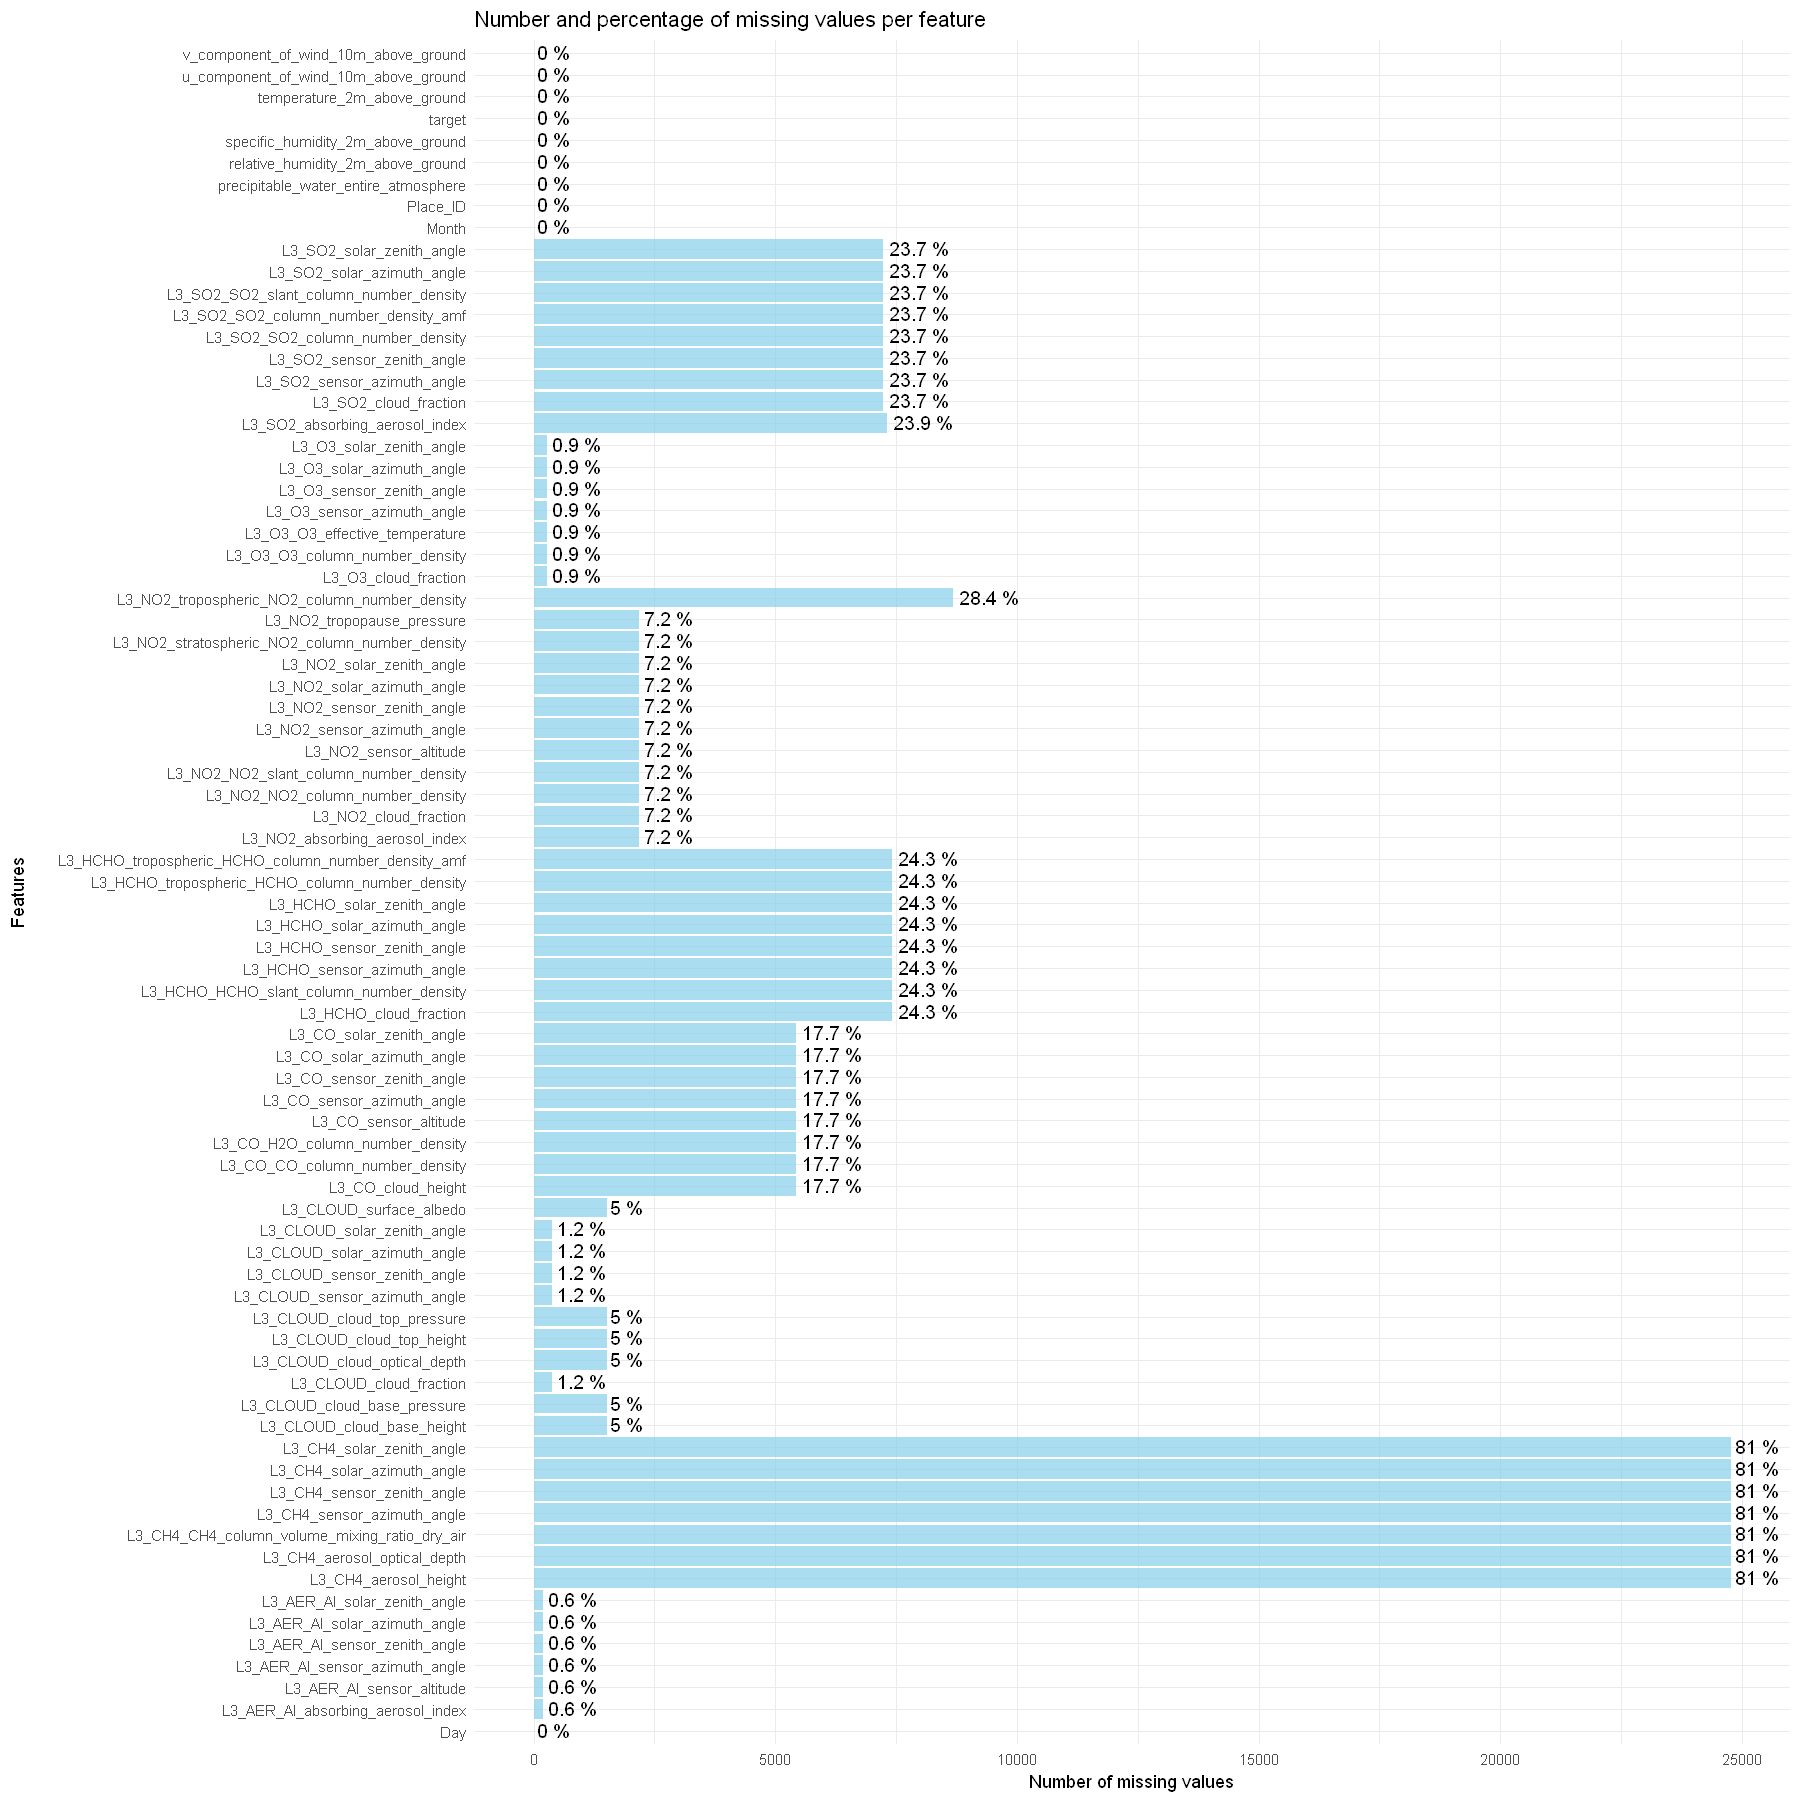

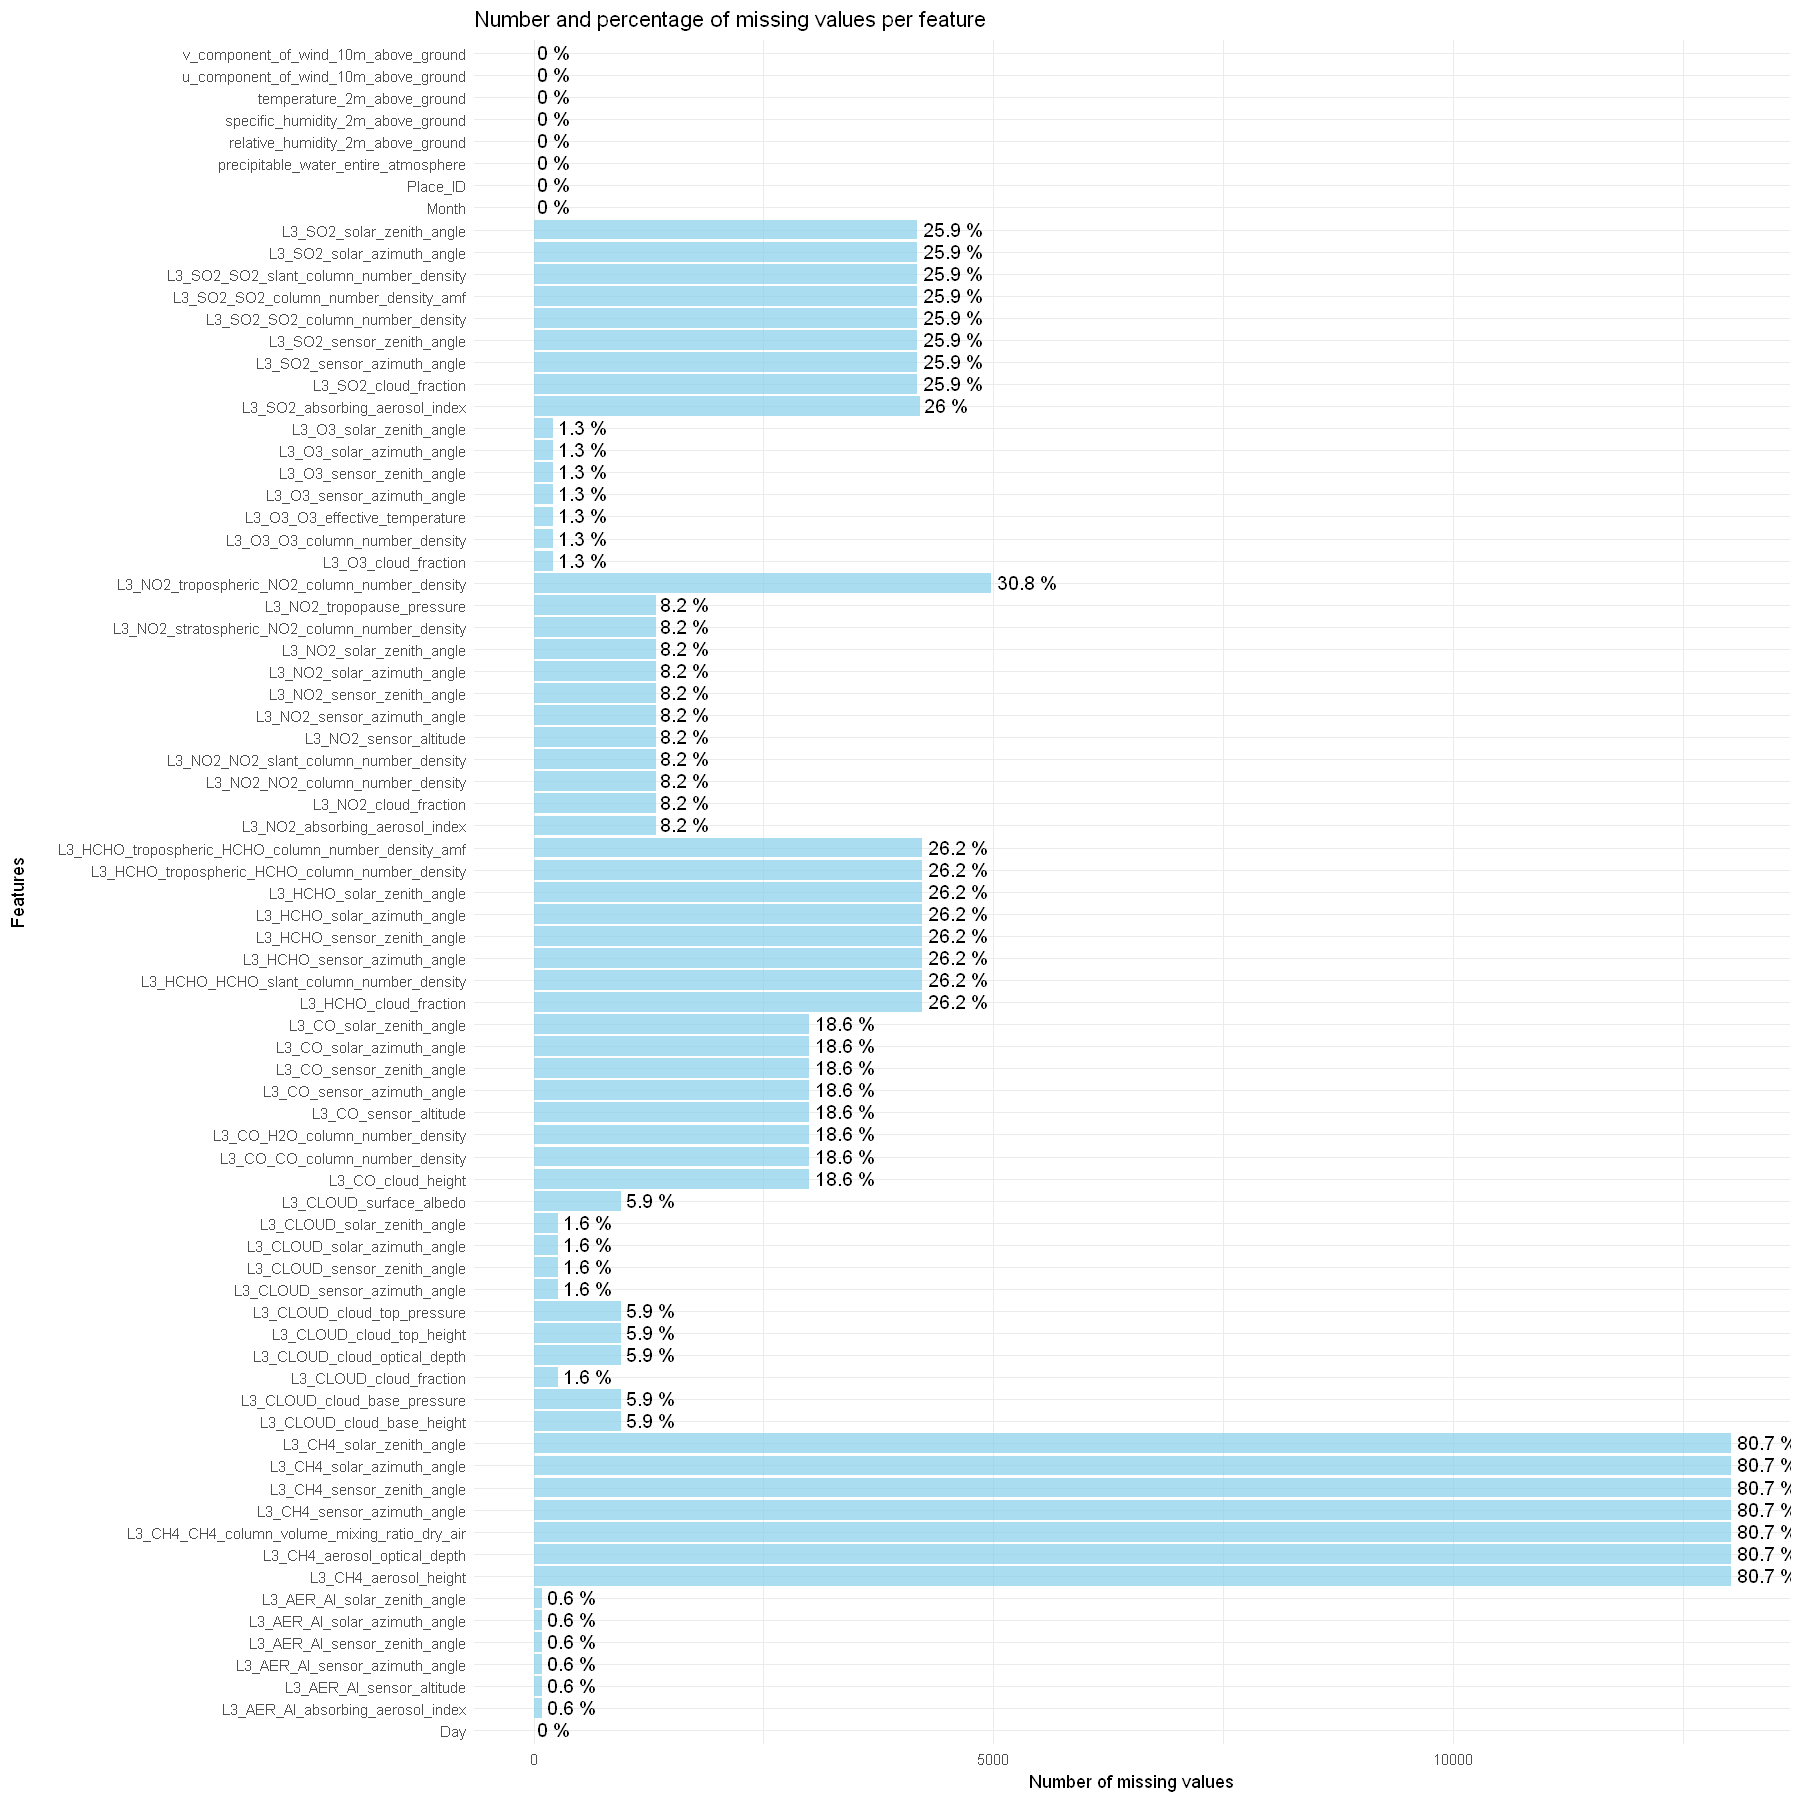

In [58]:
missing_values_analysis <- function(df) {
    features <- factor(names(df))
    number_of_missing_values <- sapply(df, function(x) {
        sum(is.na(x))
    })
    percentage_of_missing_values <- (number_of_missing_values / nrow(df)) * 100
    analysis_df <- data.frame(features = features, number_of_missing_values = number_of_missing_values, percentage_of_missing_values = percentage_of_missing_values, row.names = NULL)
    options(repr.plot.width = 15, repr.plot.height = 15)
    plot <- ggplot(analysis_df, aes(y = features)) +
        geom_bar(aes(x = number_of_missing_values), stat = "identity", fill = "skyblue", alpha = 0.7) +
        geom_text(aes(x = number_of_missing_values, label = paste(round(percentage_of_missing_values, 1), "%")), vjust = 0.4, hjust = -0.1, color = "black", size = 4) +
        theme_minimal() +
        labs(title = "Number and percentage of missing values per feature", x = "Number of missing values", y = "Features")
    print(plot)
    return(analysis_df)
}

train_analysis <- missing_values_analysis(train)
test_analysis <- missing_values_analysis(test)


In both the training and testing sets, we observed that over 50% of the values are missing for some features. They won't have a big impact so we will discard them. We set a threshold to 0.5 so that every feature having more than 50% of missing NA's are removed from the sets:

In [59]:
remove_features_with_many_NA <- function(df, threshold) {
    features <- factor(names(df))
    number_of_missing_values <- sapply(df, function(x) {
        sum(is.na(x))
    })
    percentage_of_missing_values <- (number_of_missing_values / nrow(df))
    columns_to_keep <- names(percentage_of_missing_values[percentage_of_missing_values <= threshold])
    columns_to_remove <- names(percentage_of_missing_values[percentage_of_missing_values > threshold])
    print(columns_to_remove)
    df_cleaned <- df[, columns_to_keep]
    return(df_cleaned)
}


In [60]:
train <- remove_features_with_many_NA(train, 0.5)
dim(train)


[1] "L3_CH4_CH4_column_volume_mixing_ratio_dry_air"
[2] "L3_CH4_aerosol_height"                        
[3] "L3_CH4_aerosol_optical_depth"                 
[4] "L3_CH4_sensor_azimuth_angle"                  
[5] "L3_CH4_sensor_zenith_angle"                   
[6] "L3_CH4_solar_azimuth_angle"                   
[7] "L3_CH4_solar_zenith_angle"                    


[1] 30557    71

In [61]:
test <- remove_features_with_many_NA(test, 0.5)
dim(test)


[1] "L3_CH4_CH4_column_volume_mixing_ratio_dry_air"
[2] "L3_CH4_aerosol_height"                        
[3] "L3_CH4_aerosol_optical_depth"                 
[4] "L3_CH4_sensor_azimuth_angle"                  
[5] "L3_CH4_sensor_zenith_angle"                   
[6] "L3_CH4_solar_azimuth_angle"                   
[7] "L3_CH4_solar_zenith_angle"                    


[1] 16136    70

For the other features with less than 50% of missing values, we will replace the missing values with the mean of their respective features.

In [62]:
replace_na_with_mean_value <- function(vec) {
    mean_vec <- mean(vec, na.rm = T)
    vec[is.na(vec)] <- mean_vec
    vec
}

missing_value_imputation <- function(data) {
    return(data.frame(apply(data, 2, replace_na_with_mean_value)))
}


In [63]:
train <- missing_value_imputation(train)
dim(train)
head(train)


[1] 30557    71

,Day,Month,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,38,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,0.006506796,840209.9,76.53751,38.6342842,-61.73672,22.35817,5.679268e-05,6156.074,1.703769e-05,0.1190949,234.1511,0.00000000,76.53643,38.5930174,-61.75259,22.36366,0.02108025,883.3325,267.01718,840138.5,74.54339,38.622451,-61.78902,22.37905,-1.041264e-05,0.00000000,76.53643,38.5930174,-61.75259,22.36366,6.388800e-05,0.5668279,2510.9893,77491.77,0.00000000,18.201564,3286.1340,70799.50,76.53643,38.5930174,-61.75259,22.36366,0.2268429,-1.2313300,840209.9,76.53751,38.6342842,-61.73672,22.35817,-1.268545e-04,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366
2,3,1,1,39,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,0.018360030,840772.9,-14.70804,59.6249116,-67.69351,28.61480,5.465114e-05,6156.074,2.138147e-05,0.1151788,233.3137,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,0.02201668,1148.9854,61.21669,841116.8,-57.01520,61.402626,-74.45758,33.08949,1.144485e-04,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,1.709871e-04,0.8584464,175.0199,99354.16,0.05935814,5.958538,175.0721,99353.67,-14.70804,59.6249116,-67.69351,28.61480,0.3154027,-1.0825527,840772.9,-14.70804,59.6249116,-67.69351,28.61480,1.502963e-04,0.4339572,5.021103e-05,-1.4526119,0.05943286,-14.70804,59.6249116,-67.69351,28.61480
3,4,1,1,24,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,-1.0012421,0.015903901,841410.7,-105.20134,49.8397137

In [64]:
test <- missing_value_imputation(test)
dim(test)
head(test)


[1] 16136    70

,Day,Month,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,835670.5,68.09937,1.445658,-95.98498,22.94202,4.590643e-05,6156.074,7.475449e-06,0.1133104,227.4675,0.032070799,68.09937,1.445658,-95.98498,22.94202,0.01795314,841.1429,155.982981,835625.8,32.70971,1.898112,-95.98702,22.95015,7.301102e-05,0.032070799,68.09937,1.445658,-95.98498,22.94202,8.825694e-05,1.494039,2592.634,74028.43,0.032268417,6.317523,2593.137,74023.93,68.09937,1.445658,-95.98498,22.94202,0.2990532,0.4661731,835670.5,68.09937,1.445658,-95.98498,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202
2,3,1,1,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,835281.9,75.93684,34.638933,-95.01798,18.53952,4.507089e-05,7311.869,5.300358e-06,0.1103971,227.7887,0.044783526,75.93684,34.639165,-95.01760,18.53949,0.01957558,1187.5703,922.385833,835225.3,73.80814,34.720869,-95.01710,18.54855,4.839346e-05,0.040803427,75.93681,34.641758,-95.01491,18.53912,7.446204e-05,1.534485,7334.601,48466.65,0.046211274,8.308433,7902.938,46345.61,75.93684,34.639165,-95.01760,18.53949,0.2903967,-0.2136568,835281.9,75.93684,34.638933,-95.01798,18.53952,3.386942e-05,0.6789883,1.353507e-05,-0.8427128,0.040803427,75.93681,34.641758,-95.01491,18.53912
3,4,1,1,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,834839.1,75.55244,55.872276,-94.01542,14.14082,4.405628e-05,6156.074,6.297551e-06,0.1

We check one last time that we no longer have missing values for each set:

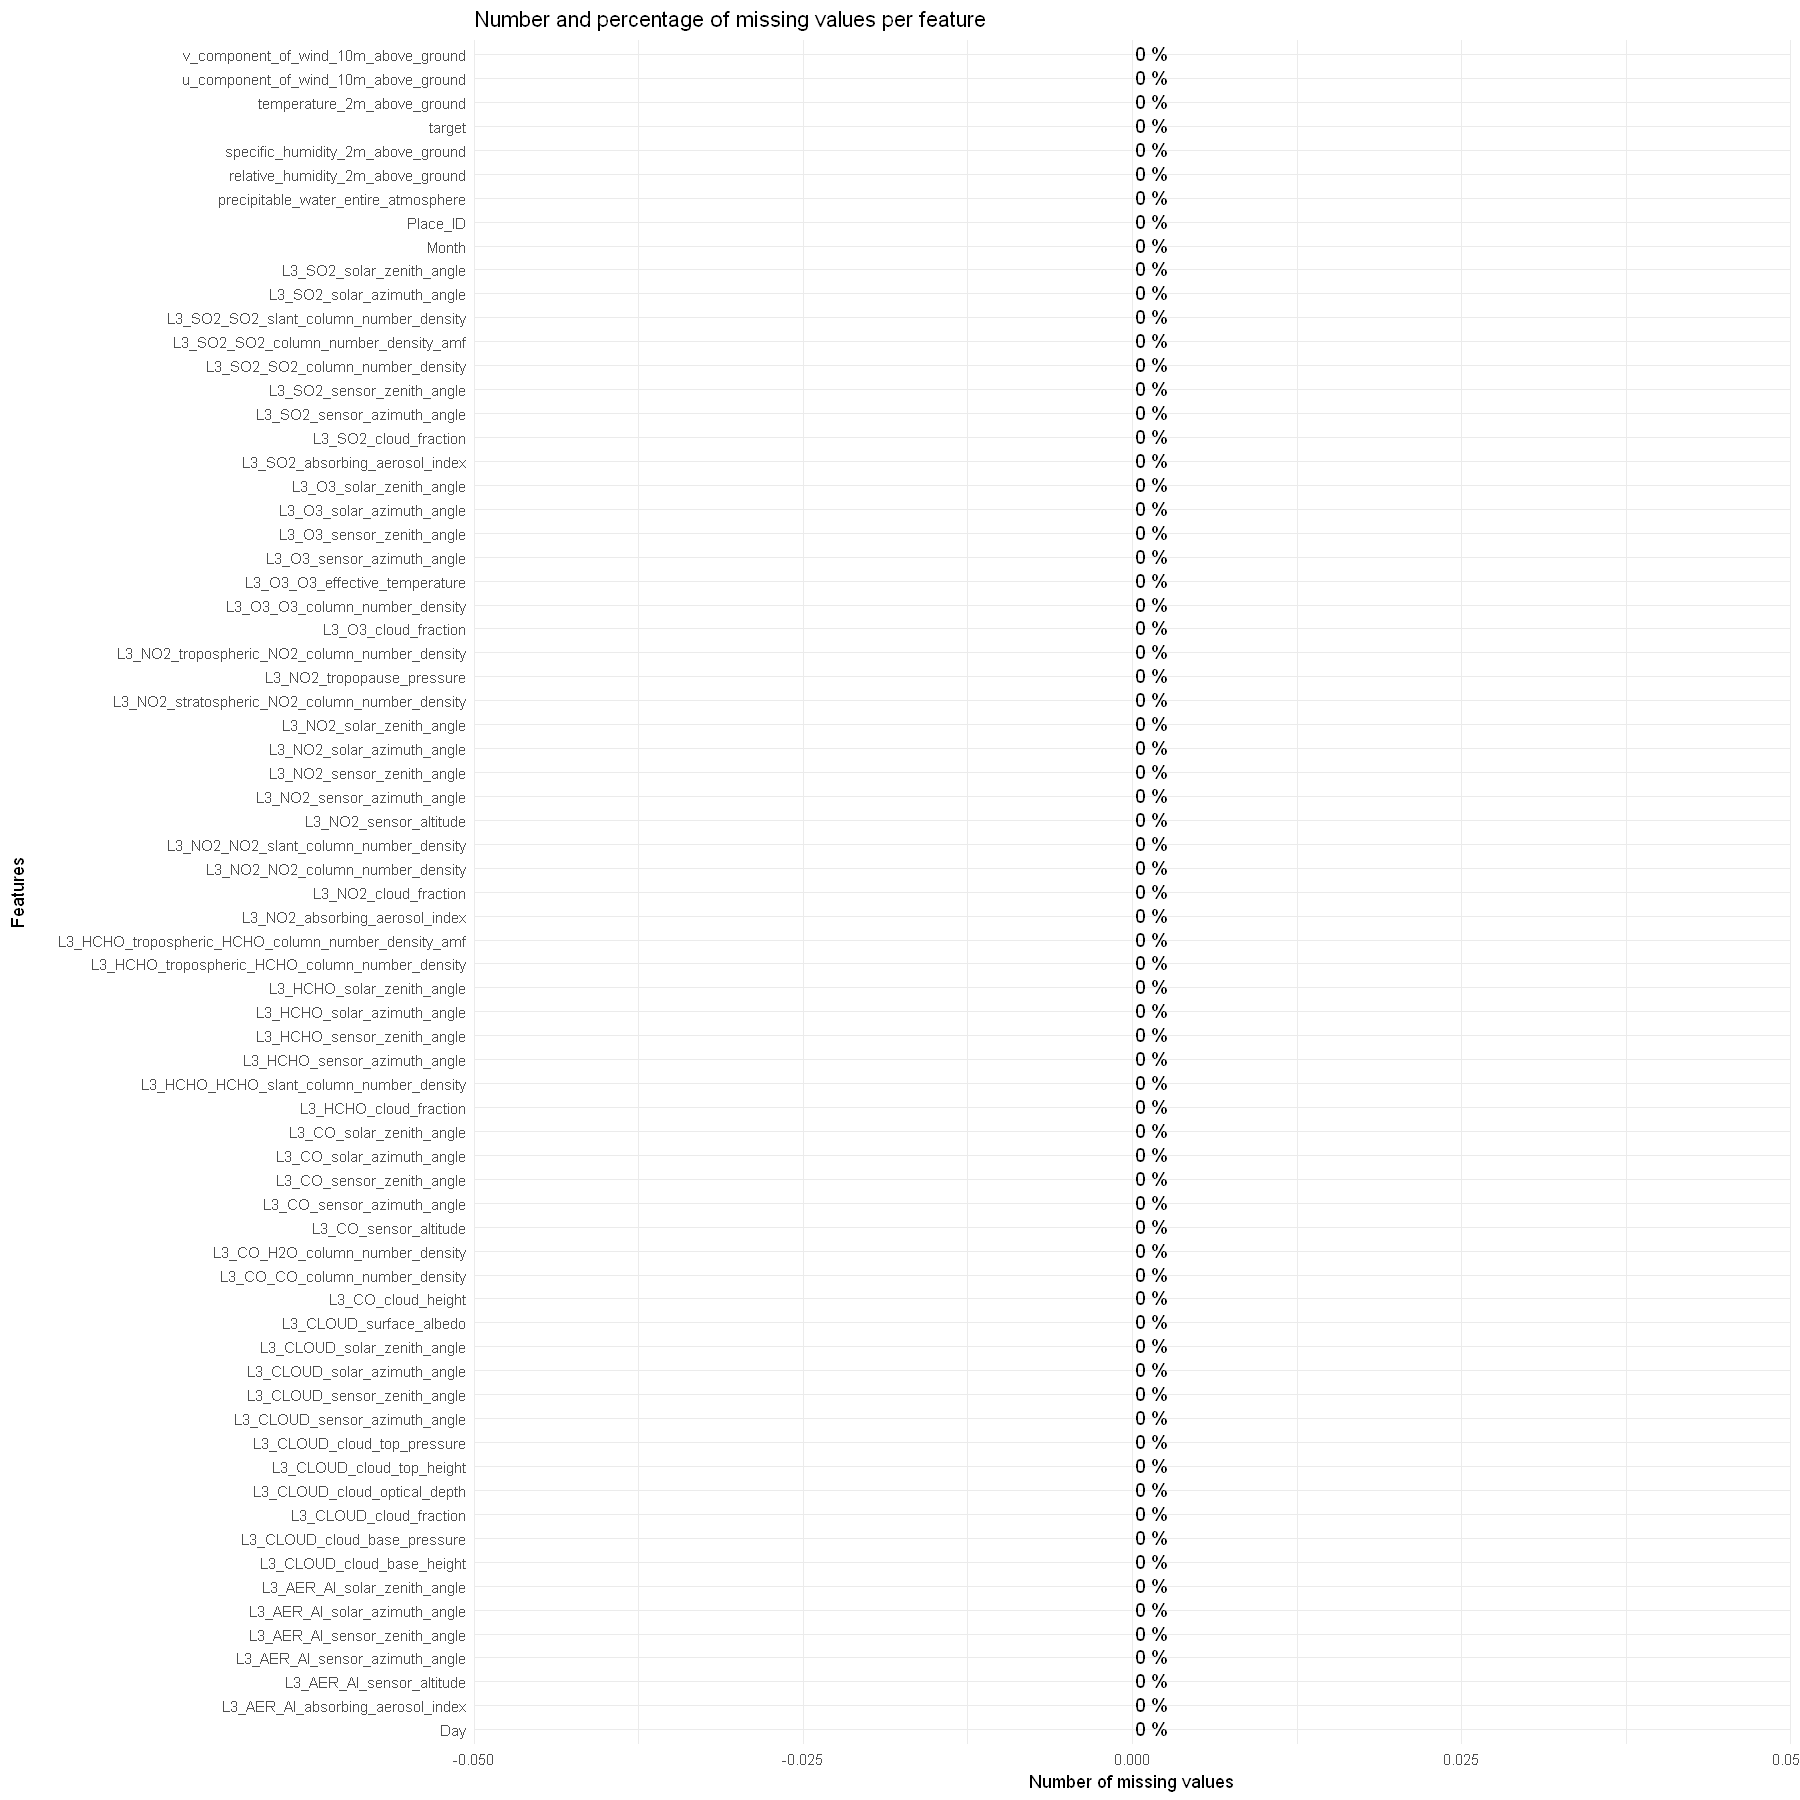

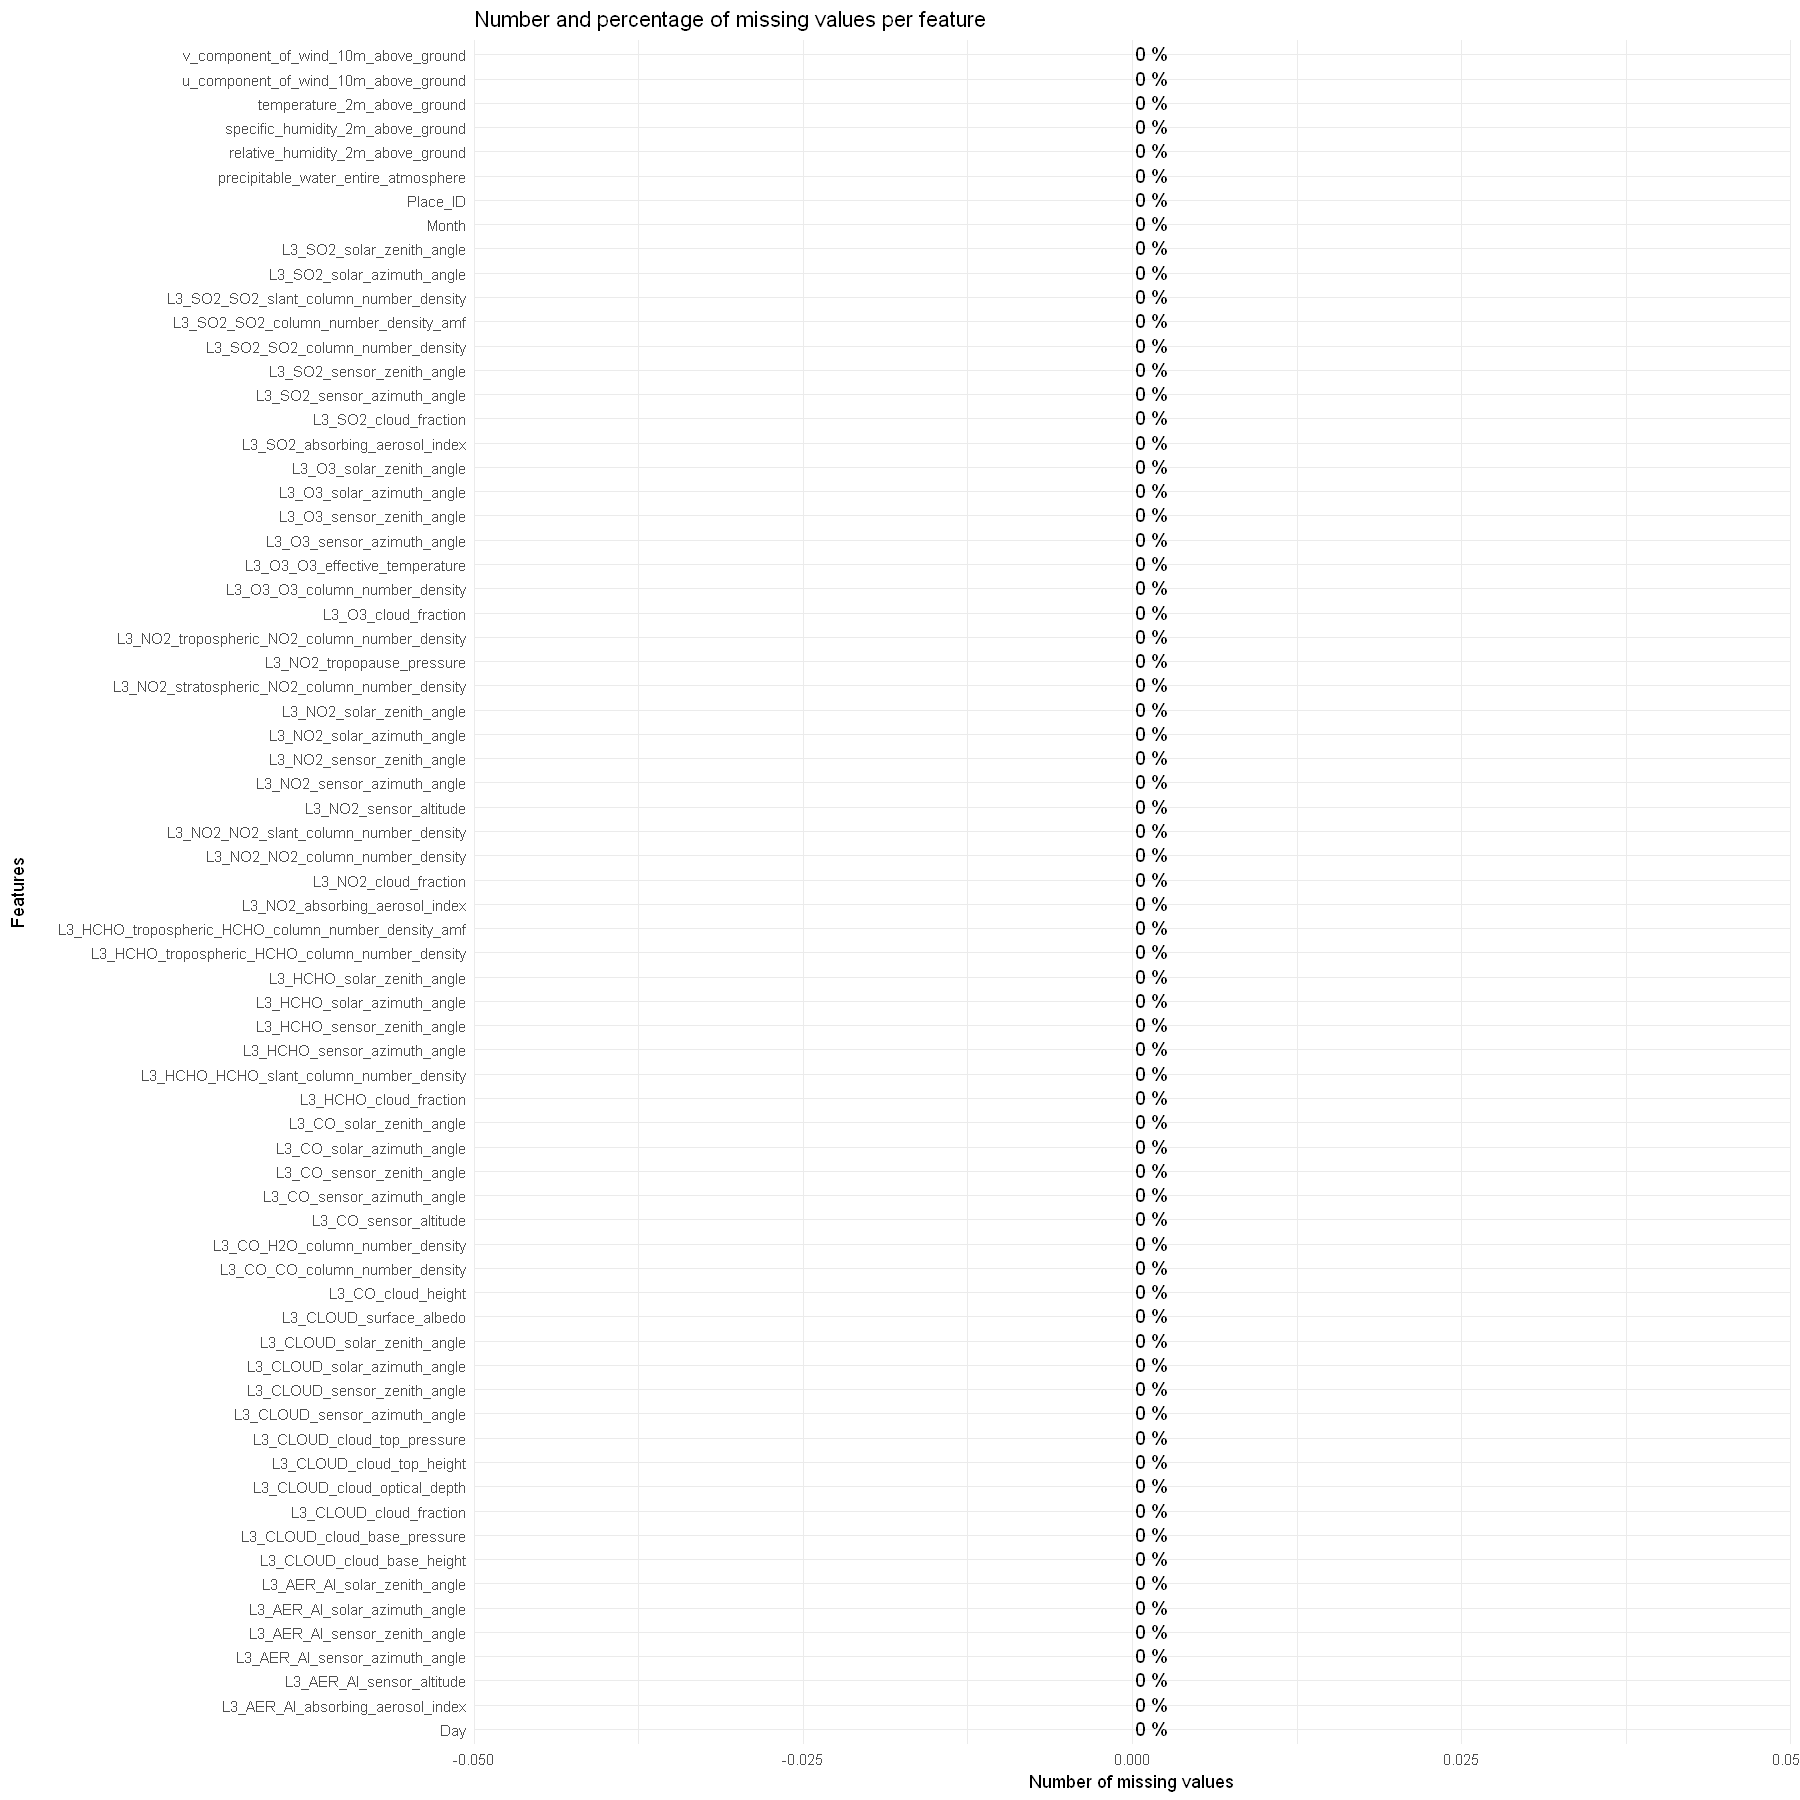

In [65]:
train_analysis <- missing_values_analysis(train)
test_analysis <- missing_values_analysis(test)


#### 1.1.5 Analysis of features distributions

Now, we can check the distribution of features in both train and test sets:

In [66]:
plot_features <- function(df) {
    features <- colnames(df)[sapply(df, is.numeric)]
    options(repr.plot.width = 4, repr.plot.height = 4)
    for (feature in features) {
        plot <- ggplot(df, aes_string(x = feature)) +
            geom_histogram(binwidth = 0.5, fill = "blue") +
            theme_minimal() +
            labs(title = paste("Distribution of", feature), x = feature, y = "Count")
        print(plot)
    }
}


In [67]:
# plot_features(train)


In [68]:
# plot_features(test)


By looking at the distribution for each feature in both sets. We see that standardization is needed to remove the effect of outliers in some features.

#### 1.1.6 Standardization

Looking at the distribution of all features, we can standardize the features so they have a mean of 0 and a standard deviation of 1

In [69]:
standardization <- function(data) {
    return(as.data.frame(scale(data)))
}


In [70]:
train <- standardization(train)
head(train)


,Day,Month,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4857096,-1.218751,-1.729979,-0.4939692,-0.40251639,-0.5504471,0.53750262,0.9841888,0.5832705,-0.4980767,-0.2255110,-0.07224205,-0.23332213,-0.9329742,0.3636427,1.28726567,0.2979602,0.6806888,-1.1788075,1.933360,-1.0622375,-0.6058736,-0.67298887,0.3578881,-1.2141099,1.24757803,0.1519076,0.8052121,-1.6338919,-1.5313290,-0.12174966,-0.9095464,0.2154494,1.3212948,0.2144229,0.9392557,-1.8640974,-0.8034784,-1.5938532,1.381977615,0.1656092,0.9681148,-1.8959800,-0.29564582,-1.5758472,0.0000000,0.0000000,-1.2428728,0.0000000,0.0000000,0.0000000,1.23968162,0.1132888,0.8551106,-1.873446,0.0000000,-0.1306629,2.625090,1.24238068,0.1074487,0.8346891,-1.852040,-0.30485830,-0.53005424,-0.4938755,0.1344872,-1.5499121,1.35951508,0.1812966,0.9859960,-1.8958011
2,-1.3736171,-1.218751,-1.729979,-0.4726297,-0.06570805,-1.1565760,0.62991865,1.4154846,1.0759062,-0.4832061,-0.2011490,0.32030151,0.01941392,-0.8922428,0.3660708,-0.06072827,1.3634443,0.5990673,-0.8446941,1.765741,-1.0622375,-0.5377376,-0.80193667,0.3326128,-1.0438215,-0.04828245,1.2668042,0.7197689,-1.2315940,-1.4366774,0.20130796,-1.0693985,0.2268261,-0.6736471,1.5664451,0.7485778,-1.0726489,1.0675427,-1.1195163,-0.008849456,1.4353959,0.8736549,-1.4110191,1.01396727,-0.6517219,-1.0674840,1.2209266,-1.0726941,-0.5279332,-1.3241453,1.5752485,-0.04435152,1.2628850,0.7679770,-1.426814,0.8905361,0.1465837,2.818152,-0.05037269,1.2539159,0.7476412,-1.413030,0.04792820,0.02151056,0.1269459,0.7966324,-1.1192292,-0.01568059,1.4514105,0.8914329,-1.4054918
3,-1.2615245,-1.218751,-

In [71]:
test <- standardization(test)
head(test)


,Day,Month,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4927538,-1.22875,-1.720798,-0.27749381,-2.22994512,-0.4364016,0.7475267,1.1545861,0.2054204,-0.5584008,-0.6021361,2.631831,-0.9616891,0.3457947,1.194278,-1.5906063,0.1730178,-1.2791101,1.0551295,-1.222456,-0.8306036,-0.9997782,0.1686478,-1.145913,1.164863,-1.82411632,0.2619026,-1.835471,-2.116677,-0.06103571,-0.9889385,0.1585507,0.7058224,-1.9596434,0.3669162,-2.123514,0.6525586,-1.335857,1.282539,-2.08930494,0.3717175,-2.190469,0.193917089,1.526412,0.09356493,-0.2494583,-1.172844,-0.5364544,-0.2636923,0.1482026,1.158754,-1.9204026,0.2961148,-2.143224,0.8477302,2.949396,0.9760991,1.162806,-1.93217687,0.2670967,-2.100801,0.12530701,2.080413,1.1279968,2.989177,-1.313566,1.263478,-2.06539378,0.4113197,-2.195589
2,-1.3804194,-1.22875,-1.720798,0.43701595,-1.53813133,0.1340325,0.7935511,1.2505976,0.1880225,-0.5949198,-0.5927184,1.481449,-0.9019398,0.3441144,1.313282,0.1199127,0.1856746,-1.5166674,0.9905295,-1.050220,-0.8636444,-1.0964605,0.1785313,-1.110100,1.279776,-0.04123612,0.2751089,-2.131849,-1.938629,0.45085147,-0.3881531,0.1537959,1.3464123,0.0102540,0.3806064,-2.467627,0.2456199,-1.267869,1.405621,-0.04086411,0.3861900,-2.555548,0.003764172,1.666281,2.29601178,-1.6775152,-1.133544,-0.4526159,2.0427798,-1.3872468,1.272662,-0.0847048,0.3095136,-2.478955,0.7572822,1.707126,0.8401904,1.277761,-0.09597557,0.2804085,-2.426160,-0.10928921,1.526862,-0.1198733,1.840611,-1.251530,1.385233,-0.01558705,0.4260938,-2.565872
3,-1.2680850,-1.22875,-1.720798,0.36236560,-1.62528910,0.1186983,0.8538634,1.6062964,0.5237695,-0.5960869,-0.

### 1.2 Feature engineering

Here, we implement all the functions needed for our feature engineering and our preprocessing pipeline for feature selection. Instead of running the data analysis part, you can directly run this part.

#### 1.2.1 Load data

In [72]:
load_data <- function(path) {
    return(read.csv(path, stringsAsFactors = T))
}


#### 1.2.2 One hot encoding

In [73]:
one_hot_encoding <- function(data) {
    if (!("Day" %in% names(data)) & !("Month" %in% names(data))) {
        if (!inherits(data$Date, "Date")) {
            data$Date <- as.Date(data$Date)
        }
        data$Day <- day(data$Date)
        data$Month <- month(data$Date)
        data$Year <- year(data$Date)
        data <- cbind(data[, c("Day", "Month", "Year")], data[, !names(data) %in% c("Day", "Month", "Year")])
        data$Place_ID <- as.numeric(factor(data$Place_ID))
        data <- data[, !names(data) %in% c("Place_ID.X.Date", "Date", "Year")]
    }
    return(data)
}


#### 1.2.3 Remove unnecessary features

In [74]:
remove_unnecessary_features <- function(train_df, test_df) {
  columns_to_remove <- setdiff(names(train_df), c(names(test_df), "target"))
  cleaned_train_df <- train_df[, !(names(train_df) %in% columns_to_remove)]
  return(cleaned_train_df)
}


#### 1.2.4 Missing value imputation

In [75]:
replace_na_with_mean_value <- function(vec) {
    mean_vec <- mean(vec, na.rm = T)
    vec[is.na(vec)] <- mean_vec
    vec
}

remove_features_with_many_NA <- function(df, threshold) {
    features <- factor(names(df))
    number_of_missing_values <- sapply(df, function(x) {
        sum(is.na(x))
    })
    percentage_of_missing_values <- (number_of_missing_values / nrow(df))
    columns_to_keep <- names(percentage_of_missing_values[percentage_of_missing_values < threshold])
    df_cleaned <- df[, columns_to_keep]
    return(df_cleaned)
}

missing_value_imputation <- function(data) {
    data <- remove_features_with_many_NA(data, 0.5)
    return(data.frame(apply(data, 2, replace_na_with_mean_value)))
}


#### 1.2.5 Standardization

For the test set, we standardize the values using the mean and standard deviation used to standardize the train set. Therefore, we can destandardize the target of our test set when we are making the predictions 

In [76]:
standardization <- function(data) {
    return(as.data.frame(scale(data)))
}

mean_sd <- function(data) {
    columns_means <- apply(data, 2, mean)
    columns_sds <- apply(data, 2, sd)
    mean_sd_df <- data.frame(mean = columns_means, sd = columns_sds)
    return(mean_sd_df)
}

standardization_test <- function(X_train, test_data) {
    mean_sd_train <- mean_sd(X_train)
    for (i in 1:ncol(test_data)) {
        column_name <- names(test_data)[i]
        test_data[, column_name] <- (test_data[, column_name] - mean_sd_train[column_name, "mean"]) / mean_sd_train[column_name, "sd"]
    }
    return(test_data)
}


#### 1.2.6 Pipeline

In [77]:
first_pipeline <- function(path) {
    data <- load_data(path)
    data <- one_hot_encoding(data)
    test <- load_data(TEST_PATH)
    test <- one_hot_encoding(test)
    data <- remove_unnecessary_features(data, test)
    data <- remove_features_with_many_NA(data, 0.5)
    data <- missing_value_imputation(data)
    return(data)
}

train_pipeline <- function(data) {
    data <- standardization(data)
    return(data)
}

test_pipeline <- function(data) {
    train_data <- first_pipeline(TRAIN_PATH)
    X_train <- train_data[, setdiff(colnames(train_data), "target")]
    data <- standardization_test(X_train, data)
    return(data)
}

feature_engineering_pipeline <- function(path) {
    if (path == TRAIN_PATH) {
        data <- first_pipeline(path)
        data <- train_pipeline(data)
        return(data)
    } else if (path == TEST_PATH) {
        data <- first_pipeline(path)
        data <- test_pipeline(data)
        return(data)
    } else {
        stop("Error in path")
    }
}


### 1.3 Feature selection

We implemented 3 filter methods for feature selection: correlation with output, PCA and mRMR.
The goal of feature selection is to identify the most informative features for a given model, enhancing its performance by reducing overfitting, improving accuracy, and reducing training time. It simplifies the model, making it easier to interpret and understand.


#### 1.3.1 Filter methods

##### 1.3.0 Load data

In [78]:
train <- feature_engineering_pipeline(TRAIN_PATH)
dim(train)
head(train)


[1] 30557    71

,Day,Month,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4857096,-1.218751,-1.729979,-0.4939692,-0.40251639,-0.5504471,0.53750262,0.9841888,0.5832705,-0.4980767,-0.2255110,-0.07224205,-0.23332213,-0.9329742,0.3636427,1.28726567,0.2979602,0.6806888,-1.1788075,1.933360,-1.0622375,-0.6058736,-0.67298887,0.3578881,-1.2141099,1.24757803,0.1519076,0.8052121,-1.6338919,-1.5313290,-0.12174966,-0.9095464,0.2154494,1.3212948,0.2144229,0.9392557,-1.8640974,-0.8034784,-1.5938532,1.381977615,0.1656092,0.9681148,-1.8959800,-0.29564582,-1.5758472,0.0000000,0.0000000,-1.2428728,0.0000000,0.0000000,0.0000000,1.23968162,0.1132888,0.8551106,-1.873446,0.0000000,-0.1306629,2.625090,1.24238068,0.1074487,0.8346891,-1.852040,-0.30485830,-0.53005424,-0.4938755,0.1344872,-1.5499121,1.35951508,0.1812966,0.9859960,-1.8958011
2,-1.3736171,-1.218751,-1.729979,-0.4726297,-0.06570805,-1.1565760,0.62991865,1.4154846,1.0759062,-0.4832061,-0.2011490,0.32030151,0.01941392,-0.8922428,0.3660708,-0.06072827,1.3634443,0.5990673,-0.8446941,1.765741,-1.0622375,-0.5377376,-0.80193667,0.3326128,-1.0438215,-0.04828245,1.2668042,0.7197689,-1.2315940,-1.4366774,0.20130796,-1.0693985,0.2268261,-0.6736471,1.5664451,0.7485778,-1.0726489,1.0675427,-1.1195163,-0.008849456,1.4353959,0.8736549,-1.4110191,1.01396727,-0.6517219,-1.0674840,1.2209266,-1.0726941,-0.5279332,-1.3241453,1.5752485,-0.04435152,1.2628850,0.7679770,-1.426814,0.8905361,0.1465837,2.818152,-0.05037269,1.2539159,0.7476412,-1.413030,0.04792820,0.02151056,0.1269459,0.7966324,-1.1192292,-0.01568059,1.4514105,0.8914329,-1.4054918
3,-1.2615245,-1.218751,-

In [79]:
X <- train[, setdiff(names(train), "target")]
Y <- train[, "target", drop = FALSE]
N <- nrow(X)
n <- ncol(X)

head(X)
head(Y)
dim(X)
dim(Y)
N
n


,Day,Month,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4857096,-1.218751,-1.729979,-0.40251639,-0.5504471,0.53750262,0.9841888,0.5832705,-0.4980767,-0.2255110,-0.07224205,-0.23332213,-0.9329742,0.3636427,1.28726567,0.2979602,0.6806888,-1.1788075,1.933360,-1.0622375,-0.6058736,-0.67298887,0.3578881,-1.2141099,1.24757803,0.1519076,0.8052121,-1.6338919,-1.5313290,-0.12174966,-0.9095464,0.2154494,1.3212948,0.2144229,0.9392557,-1.8640974,-0.8034784,-1.5938532,1.381977615,0.1656092,0.9681148,-1.8959800,-0.29564582,-1.5758472,0.0000000,0.0000000,-1.2428728,0.0000000,0.0000000,0.0000000,1.23968162,0.1132888,0.8551106,-1.873446,0.0000000,-0.1306629,2.625090,1.24238068,0.1074487,0.8346891,-1.852040,-0.30485830,-0.53005424,-0.4938755,0.1344872,-1.5499121,1.35951508,0.1812966,0.9859960,-1.8958011
2,-1.3736171,-1.218751,-1.729979,-0.06570805,-1.1565760,0.62991865,1.4154846,1.0759062,-0.4832061,-0.2011490,0.32030151,0.01941392,-0.8922428,0.3660708,-0.06072827,1.3634443,0.5990673,-0.8446941,1.765741,-1.0622375,-0.5377376,-0.80193667,0.3326128,-1.0438215,-0.04828245,1.2668042,0.7197689,-1.2315940,-1.4366774,0.20130796,-1.0693985,0.2268261,-0.6736471,1.5664451,0.7485778,-1.0726489,1.0675427,-1.1195163,-0.008849456,1.4353959,0.8736549,-1.4110191,1.01396727,-0.6517219,-1.0674840,1.2209266,-1.0726941,-0.5279332,-1.3241453,1.5752485,-0.04435152,1.2628850,0.7679770,-1.426814,0.8905361,0.1465837,2.818152,-0.05037269,1.2539159,0.7476412,-1.413030,0.04792820,0.02151056,0.1269459,0.7966324,-1.1192292,-0.01568059,1.4514105,0.8914329,-1.4054918
3,-1.2615245,-1.218751,-1.729979,0.10269603,-1.9753814,0.39

,target
,<dbl>
1,-0.4939692
2,-0.4726297
3,-0.7927232
4,-0.2592340
5,-0.8567419
6,-0.7073649


[1] 30557    70

[1] 30557     1

[1] 30557

[1] 70

##### 1.3.1.1 Correlation with the output

Correlation with output as a feature selection method involves examining the relationship between each feature and the target variable. Features that have a strong correlation with the output are considered important, as changes in these features are likely to result in changes in the output.
Highly correlated features can lead to redundancy and multicollinearity in the model, which might negatively impact the model’s performance and interpretability.

We will remove highly correlated features and keep the features that have high correlation with the target.

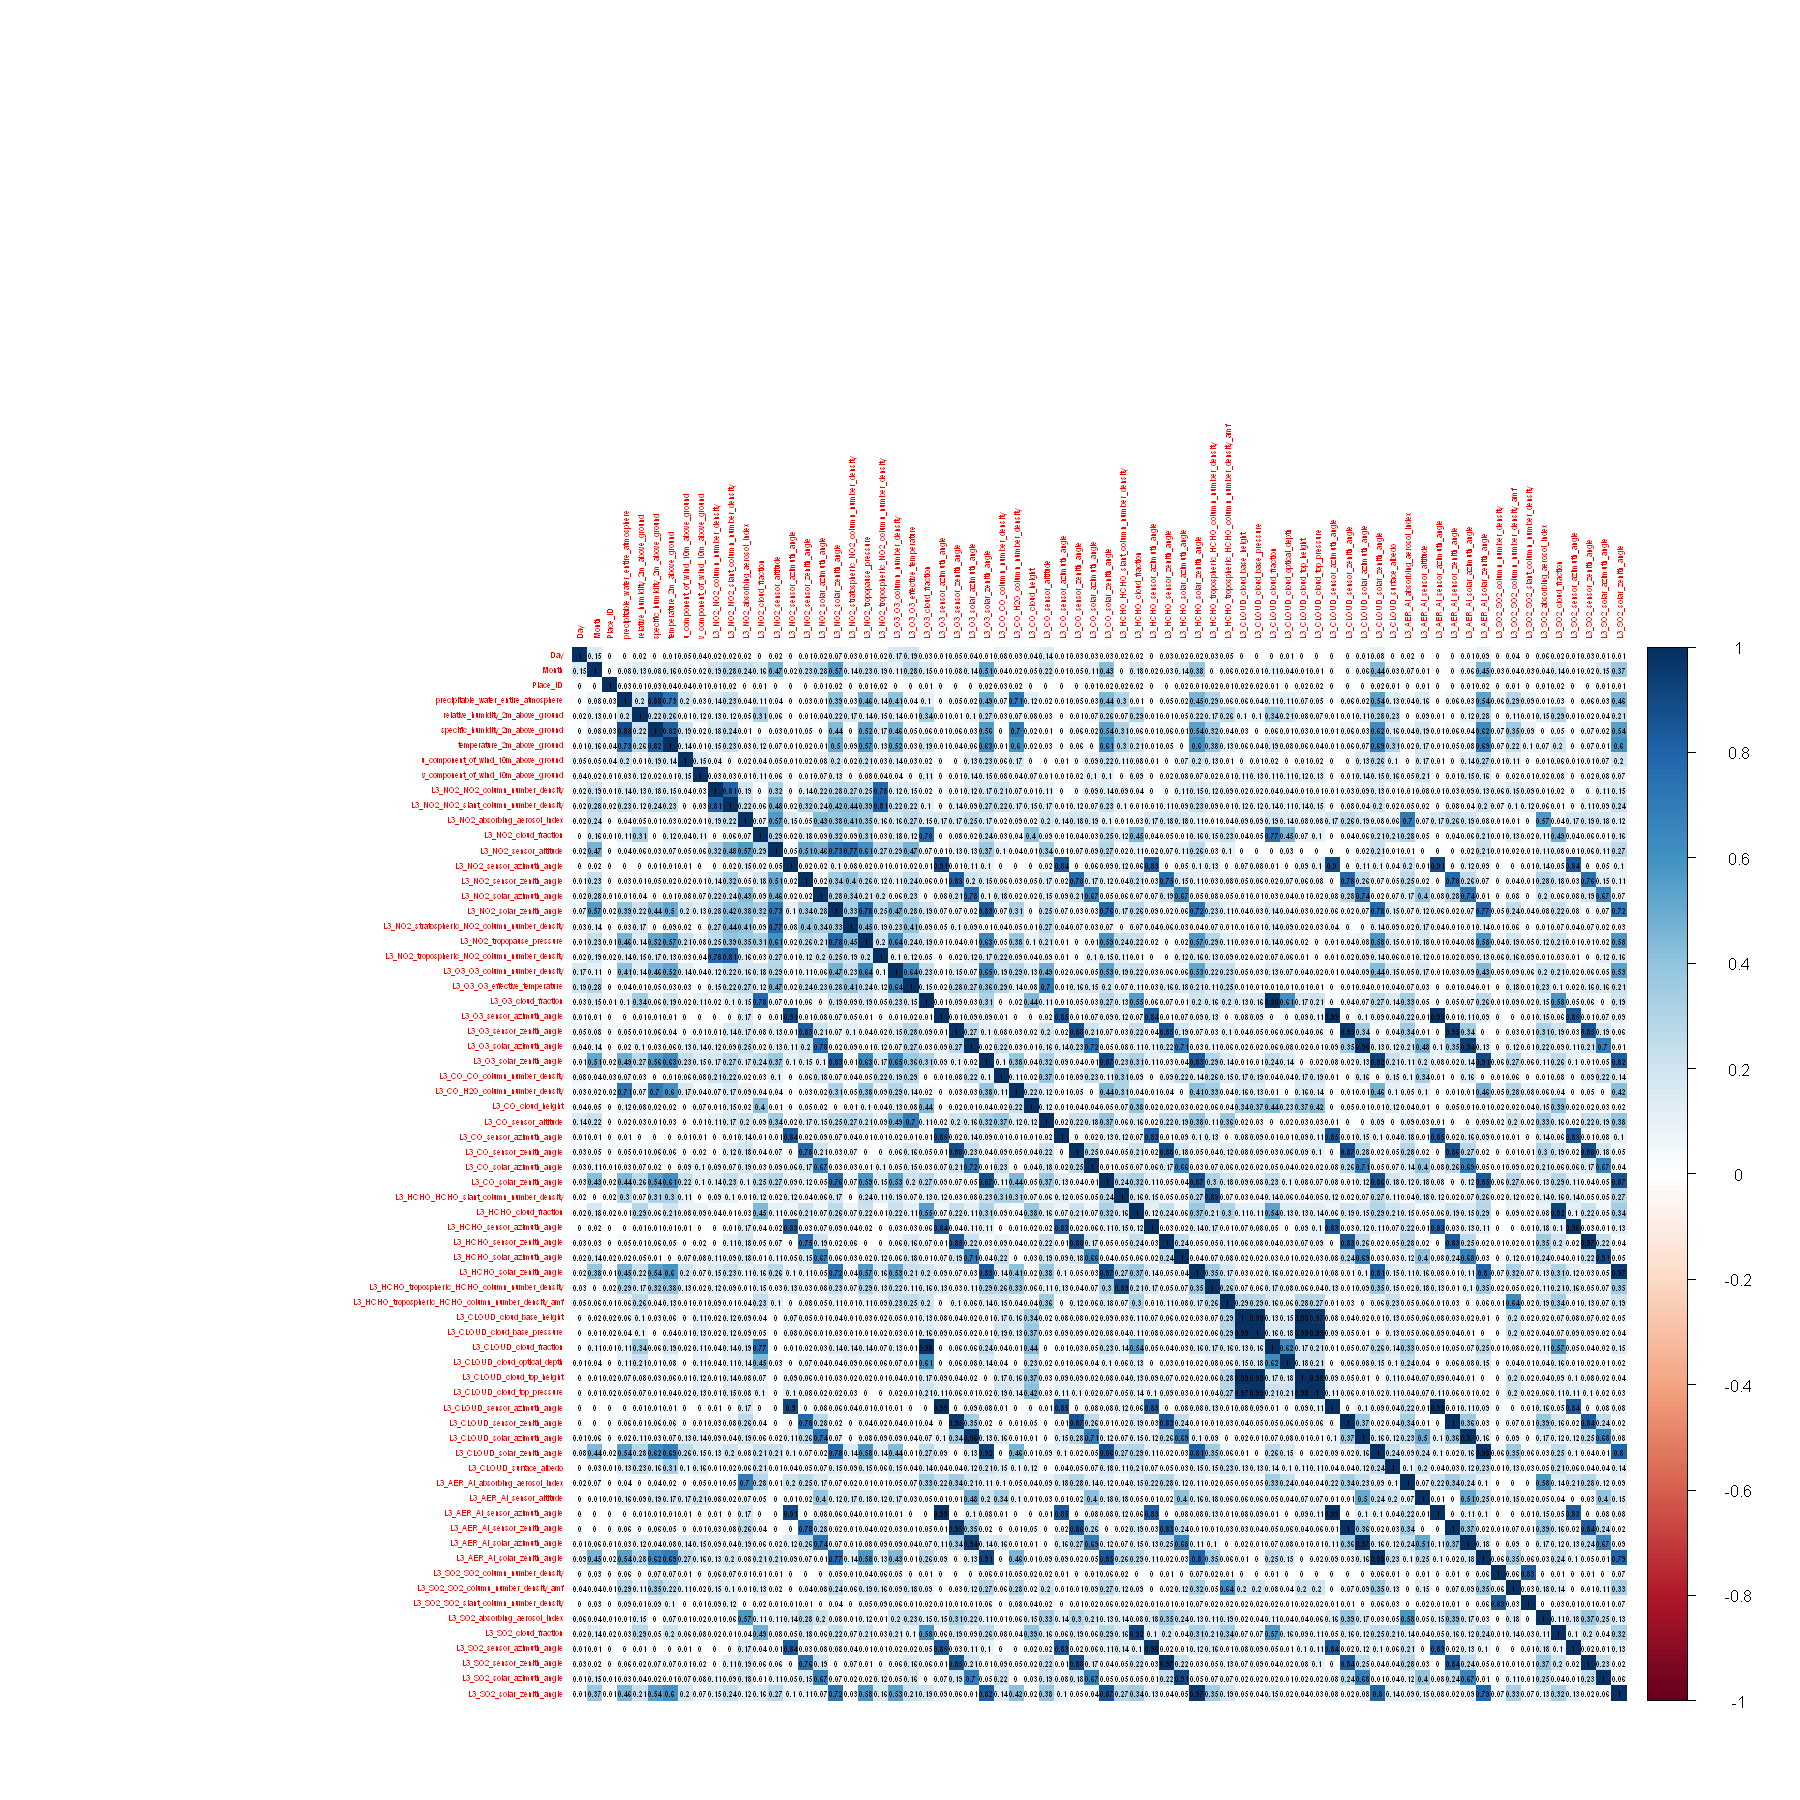

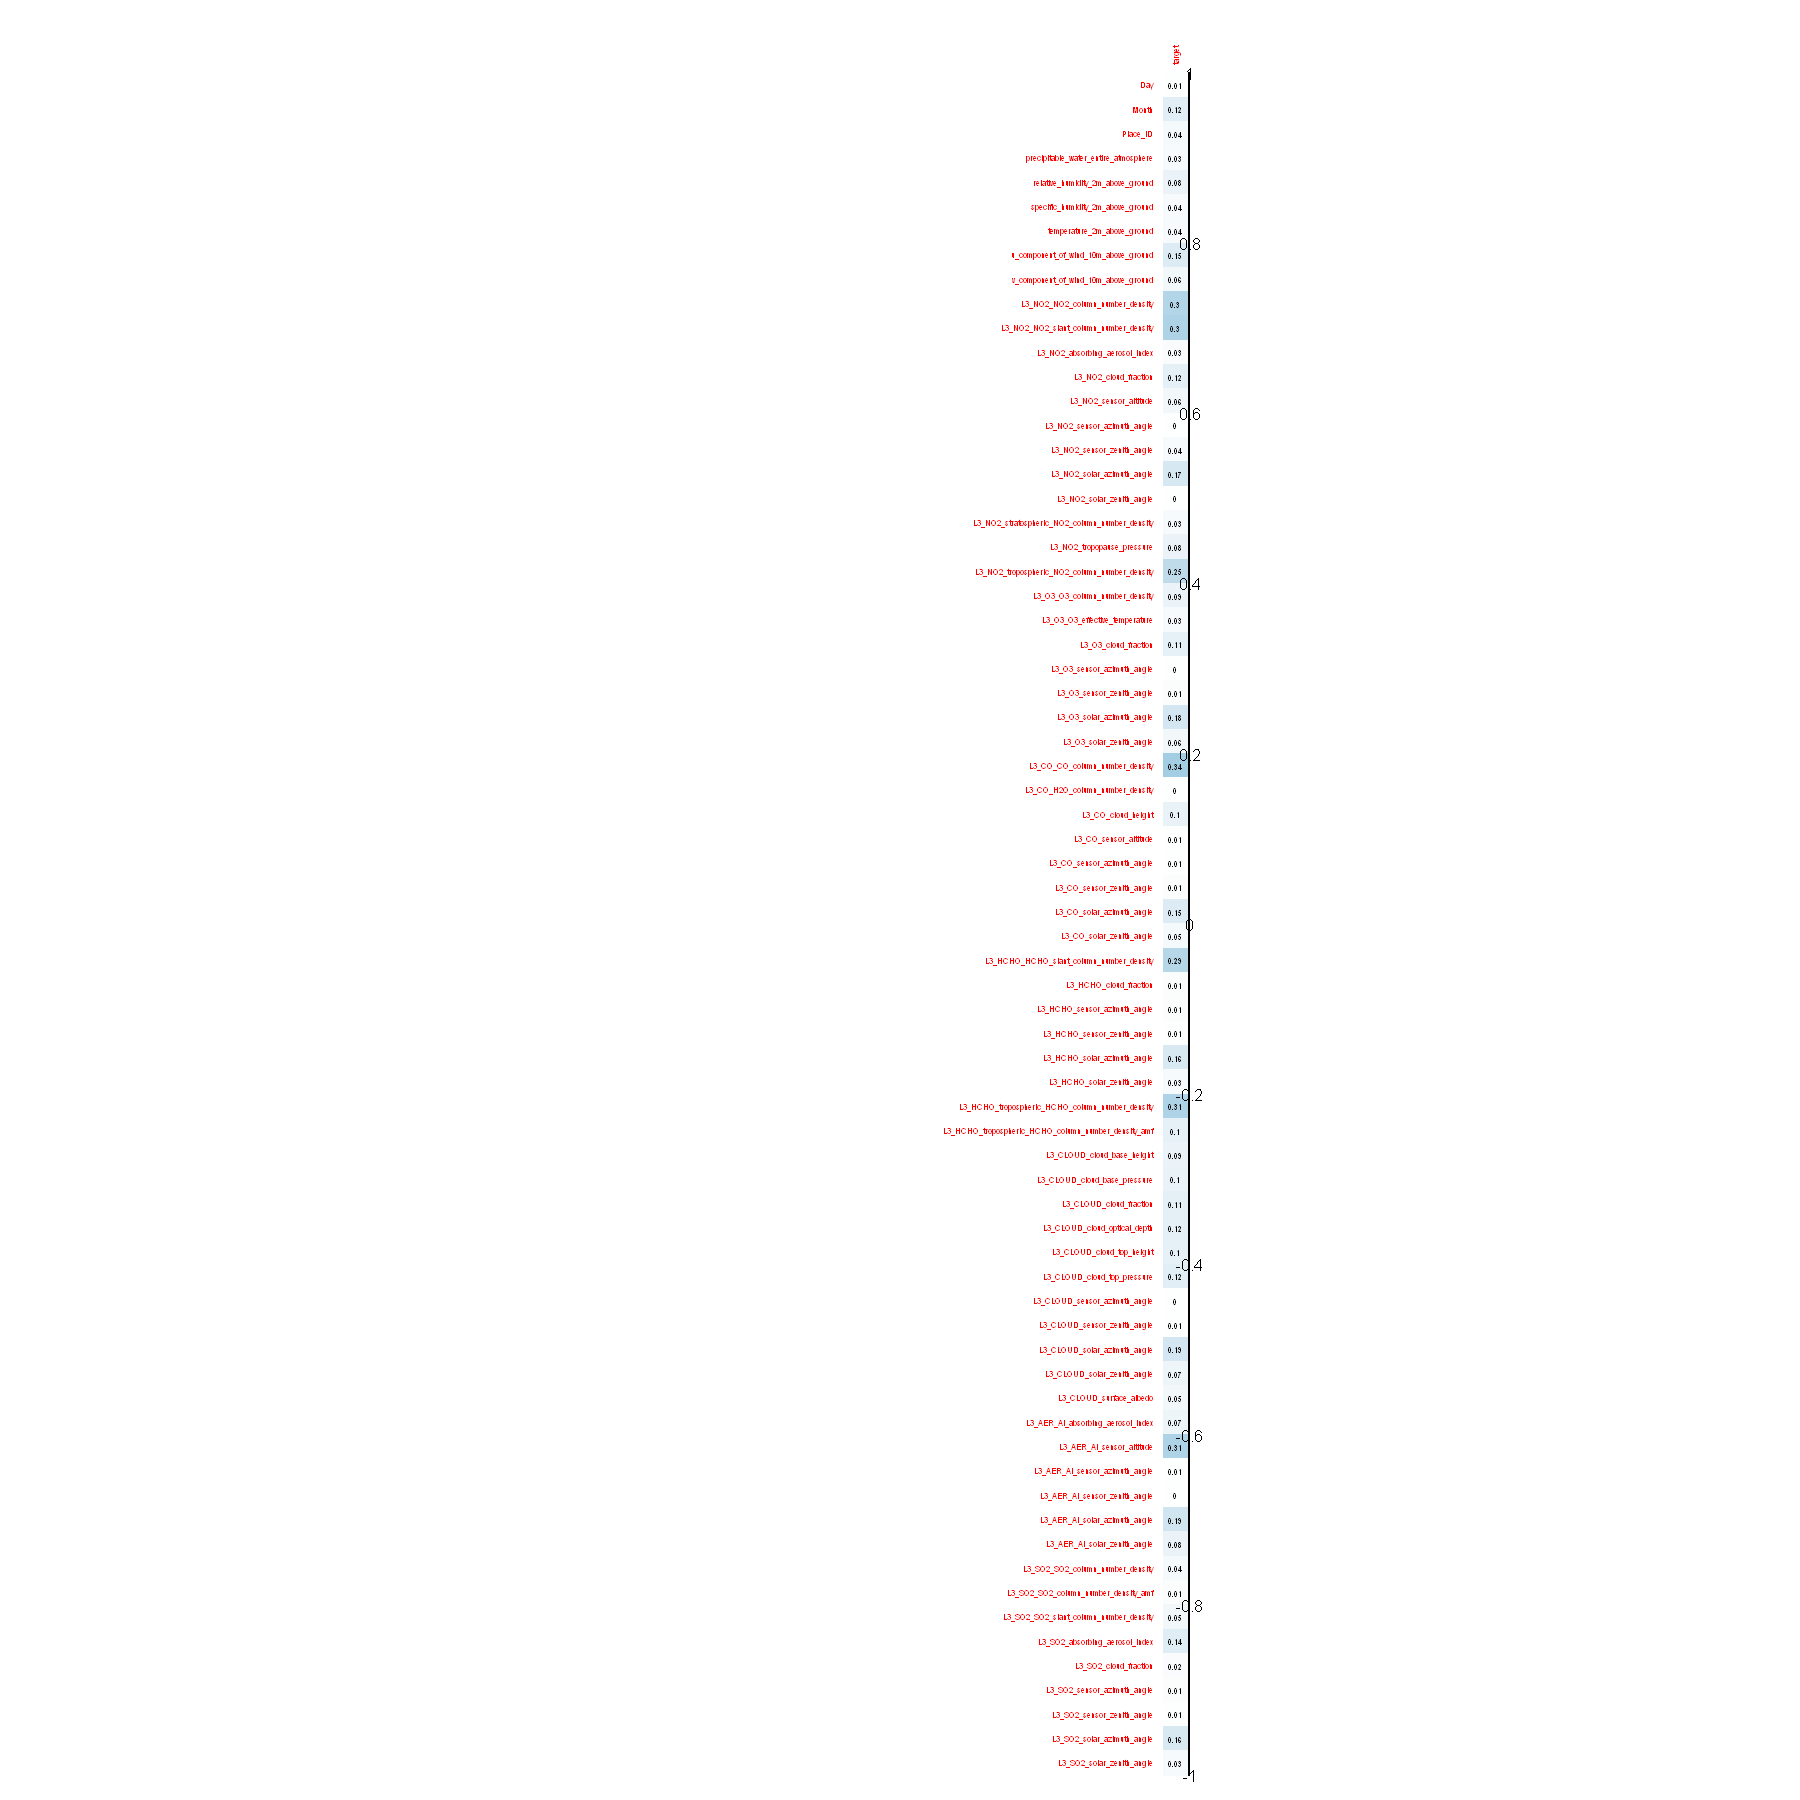

In [80]:
features_cormat <- abs(cor(X))
target_cormat <- abs(cor(X, Y))
options(repr.plot.width = 15, repr.plot.height = 15)
corrplot(features_cormat, tl.cex = 0.4, method = "color", addCoef.col = "black", number.cex = 0.4)
corrplot(target_cormat, tl.cex = 0.4, method = "color", addCoef.col = "black", number.cex = 0.4)
options(repr.plot.width = 7, repr.plot.height = 7) # Reset to default plot size


In [81]:
correlation_selection <- function(data, n_features = NULL, threshold = 0.5, verbose = FALSE) {
    X <- data[, setdiff(names(data), "target")]
    Y <- data[, "target"]
    n <- ncol(X)
    cormat <- abs(cor(X))
    target_corr <- abs(cor(X, Y))

    if (is.null(n_features)) {
        features_to_remove <- data.frame(feature = factor(), correlation_factor = numeric(), correlation_target = numeric())

        for (i in 1:(n - 1)) {
            for (j in (i + 1):n) {
                if (cormat[i, j] > threshold) {
                    feature_i <- names(X)[i]
                    feature_j <- names(X)[j]
                    corr_i_target <- target_corr[i]
                    corr_j_target <- target_corr[j]

                    if (corr_i_target > corr_j_target) {
                        feature_to_remove <- feature_j
                        correlation_factor <- cormat[i, j]
                        correlation_target <- corr_j_target
                    } else {
                        feature_to_remove <- feature_i
                        correlation_factor <- cormat[i, j]
                        correlation_target <- corr_i_target
                    }

                    features_to_remove <- rbind(features_to_remove, data.frame(feature = feature_to_remove, correlation_factor = correlation_factor, correlation_target = correlation_target))
                }
            }
        }

        features_to_remove <- unique(features_to_remove)
        features_to_remove <- features_to_remove[order(-features_to_remove$correlation_factor), ]
        row.names(features_to_remove) <- NULL
        data <- data[, !names(data) %in% features_to_remove$feature]
        return(data)
    } else if (n_features > 0 & n_features < n + 1) {
        correlation_target_df <- data.frame(feature = factor(), correlation_target = numeric())
        features_to_keep <- data.frame(feature = factor(), correlation_target = numeric())
        features_to_remove <- data.frame(feature = factor(), correlation_target = numeric())

        for (k in 1:n) {
            feature <- names(X)[k]
            correlation_target <- target_corr[k]
            correlation_target_df <- rbind(correlation_target_df, data.frame(feature = feature, correlation_target = correlation_target))
        }

        sorted_correlation_target_df <- correlation_target_df[order(-correlation_target_df$correlation_target), ]

        features_to_keep <- rbind(features_to_keep, head(sorted_correlation_target_df, n_features))
        features_to_keep <- features_to_keep[order(-features_to_keep$correlation_target), ]

        features_to_remove <- rbind(features_to_remove, tail(sorted_correlation_target_df, n - n_features))
        features_to_remove <- features_to_remove[order(features_to_remove$correlation_target), ]

        if (verbose) {
            cat("Features to keep sorted by decreasing correlation_target: \n")
            print(features_to_keep)
            cat("\n")
            cat("Features to remove sorted by increasing correlation_target: \n")
            print(features_to_remove)
            cat("\n")
        }

        data <- data[, !names(data) %in% features_to_remove$feature]

        return(data)
    } else {
        stop("features_number should be greater than 0 and less than n + 1")
    }
}


In [82]:
data <- correlation_selection(train, n_features = 10, verbose = TRUE)
head(data)


Features to keep sorted by decreasing correlation_target: 
                                           feature correlation_target
29                  L3_CO_CO_column_number_density          0.3417269
43 L3_HCHO_tropospheric_HCHO_column_number_density          0.3093434
57                       L3_AER_AI_sensor_altitude          0.3076594
11          L3_NO2_NO2_slant_column_number_density          0.3038447
10                L3_NO2_NO2_column_number_density          0.2952352
37        L3_HCHO_HCHO_slant_column_number_density          0.2859268
21   L3_NO2_tropospheric_NO2_column_number_density          0.2521957
60                   L3_AER_AI_solar_azimuth_angle          0.1930266
53                    L3_CLOUD_solar_azimuth_angle          0.1868077
27                       L3_O3_solar_azimuth_angle          0.1847714

Features to remove sorted by increasing correlation_target: 
                                               feature correlation_target
30                     L3_CO_H2O_co

,target,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_solar_azimuth_angle,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4939692,-0.2255110,-0.07224205,-0.6058736,0.8052121,-1.5313290,-0.8034784,-0.29564582,0.8551106,2.625090,0.8346891
2,-0.4726297,-0.2011490,0.32030151,-0.5377376,0.7197689,-1.4366774,1.0675427,1.01396727,0.7679770,2.818152,0.7476412
3,-0.7927232,-0.3054105,0.06736292,-0.7557628,0.5666106,-1.5721163,-0.2456906,0.43818724,0.6117888,3.036829,0.5920221
4,-0.2592340,-0.1286993,0.10983750,-0.5119616,0.6305553,-1.5185078,-0.2954993,-0.08936173,0.6769984,2.931404,0.6569944
5,-0.8567419,-0.2636269,-0.20870557,-0.7359555,0.7065521,0.1551865,-0.0892677,0.63773924,0.7544988,2.814762,0.7342120
6,-0.7073649,-0.2826382,-0.17078171,-0.6897012,0.7997227,-0.6816861,-0.5101397,0.07477050,0.8495126,2.675456,0.8288796


##### 1.3.1.2 mRMR

The mRMR (minimum Redundancy Maximum Relevance) feature selection method aims to select features that are highly correlated with the target variable (maximum relevance), while also being uncorrelated with each other (minimum redundancy). It uses mutual information to measure these quantities, providing a balance between maximizing the relevance of individual features and minimizing the redundancy among them.

In [83]:
mRMR_selection <- function(data, n_features = NULL, threshold = -0.025, verbose = FALSE) {
    X <- data[, setdiff(names(data), "target")]
    Y <- data$target
    n <- ncol(X)
    features_to_keep <- data.frame(feature = factor(), mRMR_score = numeric())
    features_to_remove <- data.frame(feature = factor(), mRMR_score = numeric())

    mrmr_data <- mRMR.data(data = data)

    mrmr_result <- mRMR.classic(data = mrmr_data, target_indices = c(4), feature_count = ncol(X))

    mRMR_df <- data.frame(feature = colnames(X), feature_index = 1:n, mRMR_score = scores(mrmr_result))
    colnames(mRMR_df)[ncol(mRMR_df)] <- "mRMR_score" # Have to rename manually because it is set to X4 by scores(mrmr_result)

    if (is.null(n_features)) {
        features_to_keep <- mRMR_df[mRMR_df$mRMR_score >= threshold, ]
        features_to_keep <- features_to_keep[, setdiff(names(features_to_keep), "feature_index")]
        features_to_keep <- features_to_keep[order(-features_to_keep$mRMR_score), ]

        features_to_remove <- mRMR_df[mRMR_df$mRMR_score < threshold, ]
        features_to_remove <- features_to_remove[, setdiff(names(features_to_keep), "feature_index")]
        features_to_remove <- features_to_remove[order(features_to_remove$mRMR_score), ]

        if (verbose) {
            cat("Features to keep sorted by decreasing mRMR score:", nrow(features_to_keep), "\n")
            print(features_to_keep)
            cat("\n")
            cat("Features to remove sorted by increasing mRMR score:", nrow(features_to_remove), "\n")
            print(features_to_remove)
            cat("\n")
            plot(mRMR_df$feature_index, mRMR_df$mRMR_score, xlab = "Feature index", ylab = "mRMR score", main = "mRMR score for each feature", pch = 16, col = "blue")
            abline(h = threshold, col = "red", lwd = 2)
        }

        data <- data[, c(features_to_keep$feature, "target")]
        return(data)
    } else if (n_features > 0 & n_features < n + 1) {
        sorted_mRMR_df <- mRMR_df[order(-mRMR_df$mRMR_score), ]
        threshold <- sorted_mRMR_df[n_features, "mRMR_score"]

        features_to_keep <- head(sorted_mRMR_df, n_features)
        features_to_keep <- features_to_keep[, setdiff(names(features_to_keep), "feature_index")]
        features_to_keep <- features_to_keep[order(-features_to_keep$mRMR_score), ]

        features_to_remove <- tail(sorted_mRMR_df, n - n_features)
        features_to_remove <- features_to_remove[, setdiff(names(features_to_keep), "feature_index")]
        features_to_remove <- features_to_remove[order(features_to_remove$mRMR_score), ]

        if (verbose) {
            cat("Features to keep sorted by decreasing mRMR score:", nrow(features_to_keep), "\n")
            print(features_to_keep)
            cat("\n")
            cat("Features to remove sorted by increasing mRMR score:", nrow(features_to_remove), "\n")
            print(features_to_remove)
            cat("\n")
            plot(mRMR_df$feature_index, sorted_mRMR_df$mRMR_score, xlab = "Feature index", ylab = "mRMR score", main = "mRMR score for each feature", pch = 16, col = "blue")
            abline(h = threshold, col = "red", lwd = 2)
        }

        data <- data[, c(features_to_keep$feature, "target")]
        return(data)
    } else {
        stop("features_number should be greater than 0 and less than n + 1")
    }
}


Features to keep sorted by decreasing mRMR score: 10 
                                feature   mRMR_score
1                                   Day 0.0620889423
3                              Place_ID 0.0306855313
4  precipitable_water_entire_atmosphere 0.0238358221
2                                 Month 0.0234464146
5     relative_humidity_2m_above_ground 0.0070462965
6     specific_humidity_2m_above_ground 0.0063972316
7           temperature_2m_above_ground 0.0049957938
10     L3_NO2_NO2_column_number_density 0.0012033659
8  u_component_of_wind_10m_above_ground 0.0011299769
12       L3_NO2_absorbing_aerosol_index 0.0007735359

Features to remove sorted by increasing mRMR score: 60 
                                               feature    mRMR_score
70                           L3_SO2_solar_zenith_angle -1.015444e-01
69                          L3_SO2_solar_azimuth_angle -9.753236e-02
68                          L3_SO2_sensor_zenith_angle -9.739045e-02
67                         L3_

,Day,Place_ID,precipitable_water_entire_atmosphere,Month,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,L3_NO2_NO2_column_number_density,u_component_of_wind_10m_above_ground,L3_NO2_absorbing_aerosol_index,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4857096,-1.729979,-0.40251639,-1.218751,-0.5504471,0.53750262,0.9841888,-0.2255110,0.5832705,-0.23332213,-0.4939692
2,-1.3736171,-1.729979,-0.06570805,-1.218751,-1.1565760,0.62991865,1.4154846,-0.2011490,1.0759062,0.01941392,-0.4726297
3,-1.2615245,-1.729979,0.10269603,-1.218751,-1.9753814,0.39491805,1.8954577,-0.3054105,1.7167127,0.15754235,-0.7927232
4,-1.1494320,-1.729979,-0.78498582,-1.218751,-2.6187286,-0.55300540,1.5680361,-0.1286993,0.9553636,0.53844341,-0.2592340
5,-1.0373394,-1.729979,-0.13119854,-1.218751,-1.3745696,-0.17277988,0.8021820,-0.2636269,0.8142205,2.48070785,-0.8567419
6,-0.9252469,-1.729979,-0.06570805,-1.218751,-1.5074926,-0.03770471,1.0546196,-0.2826382,0.9374911,0.62625303,-0.7073649


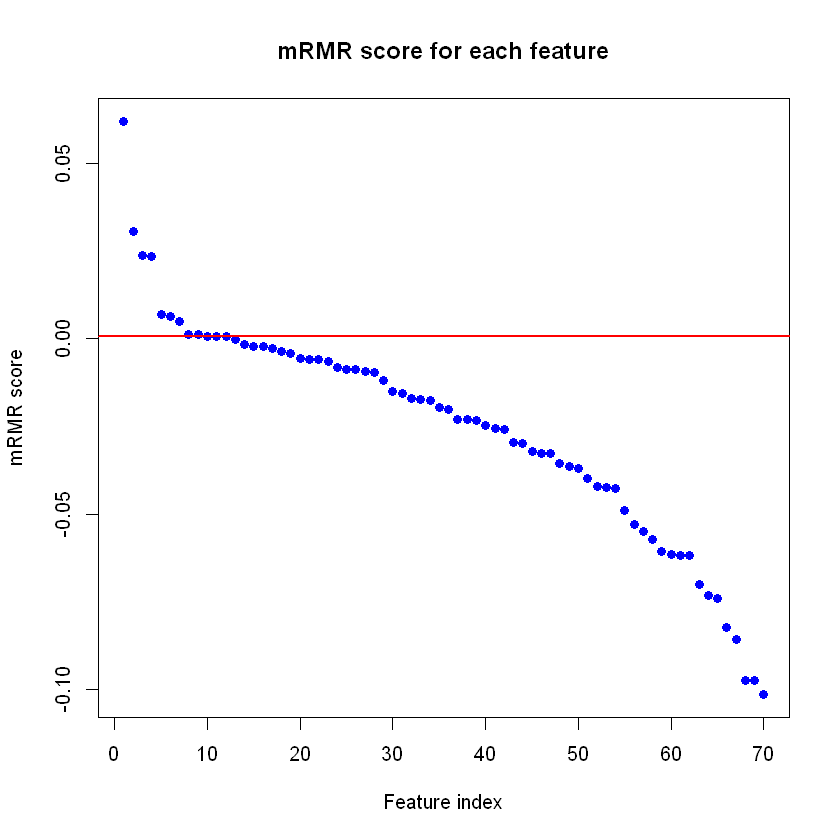

In [84]:
df <- mRMR_selection(train, n_features = 10, threshold = -0.025, verbose = TRUE)
head(df)


##### 1.3.1.3 PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features of a dataset into a new set of features, which are linear combinations of the original features.

These new features, or principal components, are orthogonal and ordered such that they capture the maximum variance in the data, with the first principal component accounting for the most variance, the second accounting for the next highest variance, and so on.

In [85]:
PCA_selection <- function(data, n_features = NULL, variance_threshold = 0.95, verbose = FALSE) {
    X <- data[, setdiff(names(data), "target")]
    Y <- data$target

    pca <- prcomp(X, scale. = TRUE)

    cum_var <- cumsum(pca$sdev^2) / sum(pca$sdev^2)

    if (!is.null(n_features)) {
        if (n_features > ncol(X)) {
            stop("n_features exceeds the number of available features.")
        }
        n_components <- n_features
        variance_threshold <- cum_var[n_components]
    } else {
        n_components <- which(cum_var >= variance_threshold)[1]
    }

    loadings <- pca$rotation
    loadings <- as.matrix(loadings)
    feature_contributions <- rowSums(loadings[, 1:n_components, drop = FALSE]^2)
    sorted_indices <- order(feature_contributions, decreasing = TRUE)
    selected_features <- names(feature_contributions)[sorted_indices[1:n_components]]

    features_to_remove <- setdiff(names(X), selected_features)

    if (verbose) {
        cat("Selected features:\n", paste(selected_features, collapse = ", "), "\n")
        cat("Removed features:\n", paste(features_to_remove, collapse = ", "), "\n")

        plot(1:length(cum_var), cum_var, type = "b", pch = 19, col = "blue", xlab = "Number of principal components", ylab = "Cumulative proportion of variance Explained", main = "PCA: Cumulative variance explained")

        if (!is.null(n_features)) {
            abline(v = n_components, col = "red", lty = 2)
            cat("Number of components to retain:", n_components, "\n")
        } else {
            abline(h = variance_threshold, col = "red", lty = 2)
            cat("Number of components to retain for", variance_threshold * 100, "% variance:", n_components, "\n")
        }
    }

    selected_data <- data[, c(selected_features, "target")]
    return(selected_data)
}


Selected features:
 Place_ID, v_component_of_wind_10m_above_ground, u_component_of_wind_10m_above_ground, Day, L3_CLOUD_surface_albedo, L3_CO_cloud_height, L3_CLOUD_cloud_optical_depth, L3_CO_CO_column_number_density, relative_humidity_2m_above_ground, L3_AER_AI_sensor_altitude, L3_CO_solar_azimuth_angle, Month, L3_SO2_absorbing_aerosol_index, L3_HCHO_tropospheric_HCHO_column_number_density_amf, L3_HCHO_HCHO_slant_column_number_density, L3_CO_H2O_column_number_density, L3_CO_sensor_altitude, L3_O3_O3_effective_temperature, L3_SO2_SO2_column_number_density_amf, L3_SO2_SO2_column_number_density, L3_SO2_SO2_slant_column_number_density, L3_NO2_cloud_fraction, L3_AER_AI_absorbing_aerosol_index, L3_HCHO_tropospheric_HCHO_column_number_density, L3_HCHO_cloud_fraction, L3_O3_O3_column_number_density, L3_SO2_cloud_fraction, L3_SO2_solar_azimuth_angle, L3_HCHO_solar_azimuth_angle, L3_NO2_stratospheric_NO2_column_number_density 
Removed features:
 precipitable_water_entire_atmosphere, specific_hu

,Place_ID,v_component_of_wind_10m_above_ground,u_component_of_wind_10m_above_ground,Day,L3_CLOUD_surface_albedo,L3_CO_cloud_height,L3_CLOUD_cloud_optical_depth,L3_CO_CO_column_number_density,relative_humidity_2m_above_ground,L3_AER_AI_sensor_altitude,L3_CO_solar_azimuth_angle,Month,L3_SO2_absorbing_aerosol_index,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_HCHO_HCHO_slant_column_number_density,L3_CO_H2O_column_number_density,L3_CO_sensor_altitude,L3_O3_O3_effective_temperature,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_column_number_density,L3_SO2_SO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_AER_AI_absorbing_aerosol_index,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_cloud_fraction,L3_O3_O3_column_number_density,L3_SO2_cloud_fraction,L3_SO2_solar_azimuth_angle,L3_HCHO_solar_azimuth_angle,L3_NO2_stratospheric_NO2_column_number_density,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.729979,-0.4980767,0.5832705,-1.4857096,0.0000000,-0.9095464,0.0000000,-1.5313290,-0.5504471,2.625090,0.9392557,-1.218751,0.1344872,-1.5758472,-0.8034784,-0.12174966,0.2154494,0.3578881,-0.53005424,-0.30485830,-0.4938755,-0.9329742,-0.1306629,-0.29564582,-1.5938532,-0.67298887,-1.5499121,0.9859960,0.9681148,1.933360,-0.4939692
2,-1.729979,-0.4832061,1.0759062,-1.3736171,0.8905361,-1.0693985,-0.5279332,-1.4366774,-1.1565760,2.818152,0.7485778,-1.218751,0.7966324,-0.6517219,1.0675427,0.20130796,0.2268261,0.3326128,0.02151056,0.04792820,0.1269459,-0.8922428,0.1465837,1.01396727,-1.1195163,-0.80193667,-1.1192292,0.8914329,0.8736549,1.765741,-0.4726297
3,-1.729979,1.2915109,1.7167127,-1.2615245,0.8106958,-1.0123213,-0.5366773,-1.5721163,-1.9753814,3.036829,0.6899158,-1.218751,0.6017472,-0.4866537,-0.2456906,0.15310421,0.2291879,0.3000081,-0.32837202,0.04767373,0.1456904,-0.9006829,0.2981080,0.43818724,-0.9389039,-0.77898270,-0.9552388,0.7219273,0.7043342,2.115969,-0.7927232
4,-1.729979,0.3826688,0.9553636,-1.1494320,0.5308870,-0.7481379,-0.5154994,-1.5185078,-2.6187286,2.931404,0.7567509,-1.218751,1.1420588,0.2169659,-0.2954993,0.09500403,0.2258891,0.2608527,0.70537895,0.14583580,0.5342743,-0.7637061,0.7159378,-0.08936173,-0.6260598,0.06665844,-0.6711863,0.7926971,0.7750268,2.148348,-0.2592340
5,-1.729979,0.9773458,0.8142205,-1.0373394,0.1146193,-0.3969729,-0.6035180,0.1551865,-1.3745696,2.814762,0.8363979,-1.218751,3.4770288,-1.3143108,-0.0892677,0.07393723,0.2220998,0.3080263,-0.09617299,0.35275186,0.8711584,-0.8572971,2.8465669,0.63773924,-1.2912162,-0.43348323,-1.2751273,0.8768055,0.8590434,2.312766,-0.8567419
6,-1.729979,0.3333135,0.9374911,-0.9252469,0.2486340,0.6607806,-0.5861427,-0.6816861,-1.5074926,2.675456,0.9336686,-1.218751,1.5493520,-1.1027979,-0.5101397,0.63250977,0.2172365,0.3088849,0.05436697,-0.11970916,-0.1603310,-0.7139356,0.8165413,0.07477050,-1.0843743,-0.44107858,-1.0873214,0.9799207,0.9620462,1.947453,-0.7073649


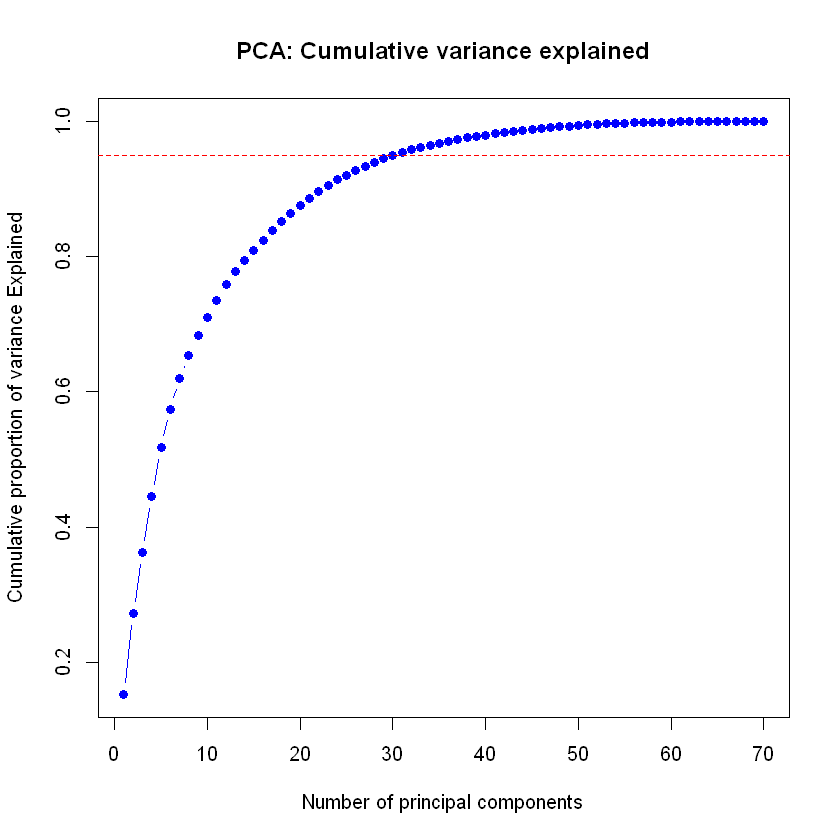

In [86]:
df <- PCA_selection(train, variance_threshold = 0.95, verbose = TRUE)
head(df)


### 1.3.2 Feature selection pipeline

Here we defined our feature selection pipeline

In [87]:
feature_selection_pipeline <- function(method, data, n_features = 70) {
    if (method == "correlation") {
        data <- correlation_selection(data, n_features = n_features)
    } else if (method == "mRMR") {
        data <- mRMR_selection(data, n_features = n_features)
    } else if (method == "PCA") {
        data <- PCA_selection(data, n_features = n_features)
    } else {
        stop("Incorrect method.")
    }
    return(data)
}


### 1.3.3 Find best feature selection method

Now that we have our feature selection methods, we need to find the best one. The best one will be the one that will minimize the number of features while having the smallest mse.

For this procedure, we use the 10-fold cross validation

In [88]:
compute_folds <- function(data, k = 10) {
    set.seed(SEED)
    rows <- 1:nrow(data)
    shuffled_rows <- sample(rows)
    folds <- split(shuffled_rows, cut(seq_along(shuffled_rows), k, labels = FALSE))
    return(folds)
}


In [89]:
cross_validation_feature_selection <- function(path, method, k, verbose = FALSE) {
    data <- feature_engineering_pipeline(path)
    X <- data[, setdiff(names(data), "target")]
    n_features <- ncol(X)
    data <- feature_selection_pipeline(method, data, n_features = n_features)

    folds <- compute_folds(data, k)
    cv_train_mse <- matrix(0, nrow = n_features, ncol = k)
    cv_test_mse <- matrix(0, nrow = n_features, ncol = k)
    cv_mse_df <- data.frame(n_features = numeric(), train_mse = numeric(), test_mse = numeric())

    for (i in 1:k) {
        if (verbose) {
            cat("Computing for fold {i} ...")
        }
        fold <- folds[[i]]
        train_data <- data[-fold, ]
        X_train <- train_data[, setdiff(names(train_data), "target")]
        y_train <- train_data[, "target"]

        test_data <- data[fold, ]
        X_test <- test_data[, setdiff(names(data), "target")]
        y_test <- test_data[, "target"]

        for (l in 1:n_features) {
            train_ds <- cbind(X_train[, 1:l, drop = FALSE], target = y_train)
            test_ds <- cbind(X_test[, 1:l, drop = FALSE], target = y_test)
            model <- lm(target ~ ., train_ds)
            train_mse <- mean((y_train - predict(model, train_ds))^2)
            test_mse <- mean((y_test - predict(model, test_ds))^2)
            cv_train_mse[l, i] <- train_mse
            cv_test_mse[l, i] <- test_mse
        }
    }

    cv_mse_df <- rbind(cv_mse_df, data.frame(n_features = c(1:n_features), train_mse = round(apply(cv_train_mse, 1, mean), digits = 4), test_mse = round(apply(cv_test_mse, 1, mean), digits = 4)))
    return(cv_mse_df)
}


In [90]:
find_best_feature_selection <- function(option) {
    methods <- c("correlation", "mRMR", "PCA")

    if (option == "compute") {
        cv_mse_methods <- data.frame(fs_method = factor(), n_features = numeric(), train_mse = numeric(), test_mse = numeric())

        for (method in methods) {
            cat("Method:", method, "\n")
            flush.console()
            result_df <- cross_validation_feature_selection(TRAIN_PATH, method, k = 10)
            cv_mse_methods <- rbind(cv_mse_methods, data.frame(fs_method = method, nfeatures = result_df$n_features, train_mse = result_df$train_mse, test_mse = result_df$test_mse))
        }

        return(cv_mse_methods)
    } else if (option == "load") {
        df <- read.csv(FEATURE_SELECTION_PATH)

        # We want to minimize nfeatures and test_mse so we are computing a weighted score for both objectives
        df$norm_n_features <- (df$nfeatures - min(df$nfeatures)) / (max(df$nfeatures) - min(df$nfeatures))
        df$norm_test_mse <- (df$test_mse - min(df$test_mse)) / (max(df$test_mse) - min(df$test_mse))
        df$combined_score <- df$norm_n_features + df$norm_test_mse

        best_method_df <- df %>%
            group_by(fs_method) %>%
            filter(combined_score == min(combined_score))
        best_overall <- best_method_df[which.min(best_method_df$combined_score), ]
        optimal_nfeatures <- df[df$nfeatures == best_overall$nfeatures, ]
        print(best_method_df)

        cat("Methods:", best_overall$fs_method, "\n")
        cat("Best number of features per method:", best_overall$nfeatures, "\n")

        plot <- ggplot(df, aes(x = nfeatures, y = test_mse, color = fs_method)) +
            geom_line() +
            geom_point() +
            geom_point(data = optimal_nfeatures, aes(x = nfeatures, y = test_mse), color = "red", size = 3)
        labs(title = "Test MSE per number of features", x = "Number of features", y = "Test MSE", color = "Feature selection method") +
            theme_minimal()
        print(plot)

        return(df)
    } else {
        stop("Invalid option. Should be 'compute' or 'load'.")
    }
}


# A tibble: 3 × 8
# Groups:   fs_method [3]
      X fs_method   nfeatures train_mse test_mse norm_n_features norm_test_mse
  <int> <chr>           <int>     <dbl>    <dbl>           <dbl>         <dbl>
1    29 correlation        29     0.706    0.708           0.406         0.228
2    99 mRMR               29     0.706    0.708           0.406         0.228
3   169 PCA                29     0.759    0.760           0.406         0.366
# ℹ 1 more variable: combined_score <dbl>
Methods: correlation 
Best number of features per method: 29 


X,fs_method,nfeatures,train_mse,test_mse,norm_n_features,norm_test_mse,combined_score
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,correlation,1,0.9999,1.0001,0.00000000,1.0000000,1.0000000
2,correlation,2,0.9847,0.9849,0.01449275,0.9598202,0.9743130
3,correlation,3,0.9831,0.9834,0.02898551,0.9558551,0.9848406
4,correlation,4,0.9827,0.9830,0.04347826,0.9547978,0.9982760
5,correlation,5,0.9724,0.9728,0.05797101,0.9278351,0.9858061
6,correlation,6,0.9724,0.9728,0.07246377,0.9278351,1.0002988
7,correlation,7,0.9584,0.9590,0.08695652,0.8913561,0.9783126
8,correlation,8,0.9375,0.9381,0.10144928,0.8361089,0.9375582
9,correlation,9,0.9372,0.9378,0.11594203,0.8353159,0.9512579


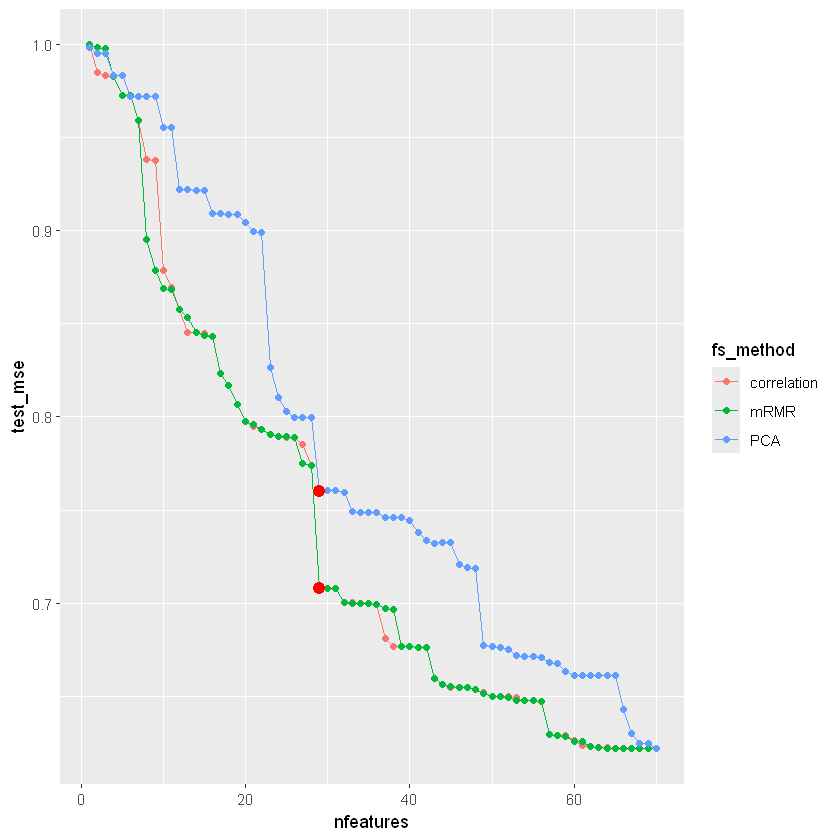

In [91]:
df <- find_best_feature_selection("load") # Compute take some time ~6min
df


Given the results, we choose correlation with 29 features since it minimizes the number of features while keeping the mse as low as possible.

### 1.4 Preprocessing pipeline

Finally, we define our preprocessing pipeline function

In [92]:
data_preprocessing_pipeline <- function(path, method = "correlation", n_features = 29) {
    if (path == TRAIN_PATH) {
        preprocessed_data <- first_pipeline(path)
        preprocessed_data <- train_pipeline(preprocessed_data)
        preprocessed_data <- feature_selection_pipeline(method, preprocessed_data, n_features)
    } else if (path == TEST_PATH) {
        preprocessed_data <- first_pipeline(path)
        preprocessed_data <- test_pipeline(preprocessed_data)
        train_data <- data_preprocessing_pipeline(TRAIN_PATH, n_features = n_features)
        preprocessed_data <- preprocessed_data[, setdiff(colnames(train_data), "target")]
    }
    return(preprocessed_data)
}


In [95]:
# preprocessed_train <- data_preprocessing_pipeline(TRAIN_PATH)
# preprocessed_train


Month,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_solar_azimuth_angle,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.218751,-0.49396923,-0.5504471,0.5832705,-0.22551098,-0.072242049,-0.9329742,0.6806888,-0.6058736,-0.67298887,-1.2141099,0.8052121,-1.531329017,-0.9095464,9.392557e-01,-0.8034784,0.9681148,-0.29564582,-1.5758472,0.0000000,0.0000000,-1.2428728,0.0000000,0.0000000,0.00000000,0.8551106,2.625090,0.8346891,0.1344872,0.9859960
-1.218751,-0.47262966,-1.1565760,1.0759062,-0.20114900,0.320301515,-0.8922428,0.5990673,-0.5377376,-0.80193667,-1.0438215,0.7197689,-1.436677397,-1.0693985,7.485778e-01,1.0675427,0.8736549,1.01396727,-0.6517219,-1.0674840,1.2209266,-1.0726941,-0.5279332,-1.3241453,1.57524852,0.7679770,2.818152,0.7476412,0.7966324,0.8914329
-1.218751,-0.79272316,-1.9753814,1.7167127,-0.30541048,0.067362915,-0.9006829,0.4531491,-0.7557628,-0.77898270,-0.9789811,0.5666106,-1.572116300,-1.0123213,6.899158e-01,-0.2456906,0.7043342,0.43818724,-0.4866537,-1.0213823,1.1519441,-1.0070734,-0.5366773,-1.1820267,1.37210765,0.6117888,3.036829,0.5920221,0.6017472,0.7219273
-1.218751,-0.25923400,-2.6187286,0.9553636,-0.12869930,0.109837495,-0.7637061,0.5140712,-0.5119616,0.06665844,-0.8666691,0.6305553,-1.518507811,-0.7481379,7.567509e-01,-0.2954993,0.7750268,-0.08936173,0.2169659,-0.9721255,1.1038901,-0.8943754,-0.5154994,-1.1878141,1.40306201,0.6769984,2.931404,0.6569944,1.1420588,0.7926971
-1.218751,-0.85674186,-1.3745696,0.8142205,-0.26362692,-0.208705569,-0.8572971,0.5864753,-0.7359555,-0.43348323,-1.1054623,0.7065521,0.155186481,-0.3969729,8.363979e-01,-0.0892677,0.8590434,0.63773924,-1.3143108,0.8241549,-0.9838245,-1.1367726,-0.6035180,0.8633158,-1.00613463,0.7544988,2.814762,0.7342120,3.4770288,0.8768055
-1.218751,-0.70736489,-1.5074926,0.9374911,-0.28263823,-0.170781712,-0.7139356,0.6752542,-0.6897012,-0.44107858,-1.0312054,0.7997227,-0.681686138,0.6607806,9.336686e-01,-0.5101397,0.9620462,0.07477050,-1.1027979,0.5113117,-0.6637581,-1.0536570,-0.5861427,0.5719359,-0.71975606,0.8495126,2.675456,0.8288796,1.5493520,0.9799207
-1.218751,-0.85674186,-1.2469634,0.6664590,-0.37340304,0.145624858,0.6066992,0.6136127,0.0000000,-0.32176320,0.1599995,0.7354480,0.063448430,0.4023850,1.057519e+00,-2.6022038,0.6480272,-2.24529884,-0.6289116,-0.2668573,0.1805828,0.1667285,0.2763619,-0.1528449,0.02573354,0.7839663,2.829232,0.7631536,2.9149830,0.8243433
-1.218751,-0.92076055,-0.4334749,1.0601218,-0.29007538,0.339461222,-0.8193648,0.6940029,-0.7418579,-0.32152334,-1.0957110,0.8194149,-0.114957725,-0.6243042,9.551334e-01,-0.6361150,0.9838165,0.08273759,-1.2695343,-0.5714874,0.6019148,-1.1202381,-0.5542811,-0.5158194,0.52546340,0.8695944,2.727499,0.8488882,5.4478340,1.0017148
-1.218751,-0.85674186,-1.6776340,0.8512609,-0.25937798,-0.073697561,-0.8655474,0.5152197,-0.6654128,-0.44112894,-0.9797188,0.6317610,-0.299297945,-0.6751195,7.580448e-01,-0.1634165,0.7763598,0.33289609,-1.0062058,-0.7619142,0.8153590,-1.0043510,-0.5519672,-0.8655562,0.95911077,0.6782281,2.963578,0.6582193,3.0697327,0.7940315


In [96]:
# preprocessed_test <- data_preprocessing_pipeline(TEST_PATH)
# preprocessed_test


Month,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_cloud_fraction,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_solar_azimuth_angle,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.218751,-2.14552286,1.3070545,-0.4517207,-0.52778182,-0.9183872,0.2114097,-0.7558658,-0.8634577,-1.12221989,0.3128767,-1.8474110,-0.99579036,0.42453288,0.44661012,0.42382423,0.002338846,1.3624413,0.037309810,-0.19341391,-1.15035984,-0.51245343,-0.294956568,0.17788231,0.3530351,1.0686462,0.3342115,2.92163481,0.44111096
-1.218751,-1.47027409,1.4082560,-0.4841808,-0.51908848,-0.8580624,0.2246599,-0.7899841,-0.9593891,-1.08579509,0.3267899,-1.6834180,-0.40049967,0.43913139,0.07772047,0.43924832,-0.166345923,1.4906146,2.204278968,-1.62093639,-1.11038592,-0.42660310,1.965026345,-1.34904783,0.3672235,0.9354013,0.3483426,1.78434960,0.45655189
-1.218751,-1.55534492,1.7831828,-0.4852182,-0.27652779,-0.9196860,0.2383972,-0.7743422,-0.8900932,-1.19372963,0.3412033,-1.7683210,-0.12125913,0.45441835,-0.55584480,0.45514008,-0.562146787,1.9531939,1.223571434,-0.89434450,-1.22037072,-0.50823037,1.069002860,-0.71946922,0.3819221,0.7835650,0.3629932,1.98831154,0.47246100
-1.218751,-0.92794830,1.8600936,-0.4339140,-0.08364719,-0.6502065,0.1941028,-0.6838107,-0.8634154,-1.03624824,0.2947176,-1.8119158,-0.42165931,0.40553192,-1.02463849,0.40374876,-0.922013494,1.8665033,0.041261835,-0.15551129,-1.06680942,-0.50689161,-0.279644489,0.20609227,0.3345167,1.2741458,0.3157541,1.96671755,0.42101357
-1.218751,0.05568153,1.1428774,-0.4329323,-0.31100880,-0.8137684,0.2104196,-0.7462958,-0.8212653,-1.09154477,0.3118372,-1.7753507,-1.11617082,0.42343574,-2.00164579,0.42267000,-1.411590378,1.1483078,0.021115706,-0.16209283,-1.12197696,-0.48845721,-0.304253971,0.20324532,0.3519750,1.1964080,0.3331557,2.97362829,0.43996044
-1.218751,-0.06660736,1.3030759,-0.3995586,-0.47056194,-0.8756418,0.2276515,-0.6836408,-0.8352324,-1.09953818,0.3299245,-1.8950028,-1.11266096,0.44235445,-0.50504829,0.44267100,-0.516635718,1.6718173,0.017918993,-0.15396744,-1.12865204,-0.48490429,-0.313157055,0.21702038,0.3704202,1.1050727,0.3515332,3.55505721,0.45997831
-1.218751,-2.02323376,1.6672010,-0.4114612,-0.43641368,-0.9465894,0.2466242,-0.7259362,-0.8684751,-1.16103615,0.3498344,-1.8336853,-1.03867187,0.46317846,0.14581248,0.46468194,-0.152196464,1.5758370,0.019440095,-0.15383133,-1.18955055,-0.51960993,-0.311814491,0.21723182,0.3907239,0.9786884,0.3717672,2.97444992,0.48201329
-1.218751,-1.71485249,1.5032549,-0.3396182,-0.11136559,-0.9550752,0.2690479,-0.6238211,-0.8921369,-1.20039485,0.3733748,-1.6682153,-1.02526178,0.48819467,-0.06186932,0.49070654,-0.259362029,1.8476209,-0.005469055,-0.10397308,-1.22909224,-0.56615966,-0.335014688,0.26648390,0.4147301,0.8322874,0.3956816,2.95588660,0.50806630
-1.218751,-1.62446483,1.1909962,-0.3839567,0.16268709,-0.8419152,0.2536099,-0.6552866,-0.9007718,-1.17034440,0.3570873,-1.7873582,-1.05091495,0.45699422,0.37455564,0.47270025,-0.143540674,1.9491602,0.980509637,-0.80199954,-1.19737054,-0.31661104,0.662351618,-0.45085479,0.3981203,0.9891909,0.3791324,1.99255758,0.49004036


## 2. Model selection procedure

In this section, we will implement a validation and model selection procedure to compare three different strategies for addressing the regression problem: Random Forest, Support Vector Machine (SVM), and Multi-Layer Perceptron (MLP). We will use 10-fold cross-validation for validation, find the best hyperparameters for each model using a grid search, and finally select the best model based on the one that achieves the lowest Root Mean Square Error (RMSE).

In [97]:
compute_folds <- function(data, k = 10) {
    set.seed(SEED)
    rows <- 1:nrow(data)
    shuffled_rows <- sample(rows)
    folds <- split(shuffled_rows, cut(seq_along(shuffled_rows), k, labels = FALSE))
    return(folds)
}

time <- function() {
    return(format(Sys.time(), "%Y-%m-%d %H:%M:%S"))
}


### 2.1 Random Forest (randomForest)

Random forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of individual trees to improve regression accuracy and control overfitting.

#### 2.1.1 Cross-validation

In [98]:
cross_validation_random_forest <- function(k, ntrees, mtry, nodesize, verbose = FALSE) {
    df <- data_preprocessing_pipeline(TRAIN_PATH)
    folds <- compute_folds(df, k)
    cv_fold_df <- data.frame(fold = numeric(), cv_train_nmse = numeric(), cv_train_rmse = numeric(), cv_test_nmse = numeric(), cv_test_rmse = numeric())
    cv_df <- data.frame(train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

    for (i in 1:k) {
        if (verbose) {
            cat("Computing for fold", i, "...\n")
            flush.console()
        }
        fold <- folds[[i]]
        train_data <- df[-fold, ]
        X_train <- train_data[, setdiff(names(train_data), "target")]
        y_train <- train_data[, "target"]

        test_data <- df[fold, ]
        X_test <- test_data[, setdiff(names(test_data), "target")]
        y_test <- test_data[, "target"]

        random_forest <- randomForest(target ~ ., data = train_data, ntree = ntrees, mtry = mtry, nodesize = nodesize, importance = verbose)

        cv_train_fold_nmse <- mean((y_train - predict(random_forest, X_train))^2) / mean((y_train - mean(y_train))^2)
        cv_train_fold_rmse <- sqrt(mean((y_train - predict(random_forest, X_train))^2))
        cv_test_fold_nmse <- mean((y_test - predict(random_forest, X_test))^2) / mean((y_test - mean(y_test))^2)
        cv_test_fold_rmse <- sqrt(mean((y_test - predict(random_forest, X_test))^2))

        cv_fold_df <- rbind(cv_fold_df, data.frame(fold = i, cv_train_nmse = cv_train_fold_nmse, cv_train_rmse = cv_train_fold_rmse, cv_test_nmse = cv_test_fold_nmse, cv_test_rmse = cv_test_fold_rmse))
    }

    cv_df <- rbind(cv_df, data.frame(train_nmse = mean(cv_fold_df$cv_train_nmse), train_rmse = mean(cv_fold_df$cv_train_rmse), test_nmse = mean(cv_fold_df$cv_test_nmse), test_rmse = mean(cv_fold_df$cv_test_rmse)))
    return(cv_df)
}


In [99]:
# df <- cross_validation_random_forest(10, 1, 1, 1, verbose = TRUE) # Test
# df


#### 2.1.2 Grid search for random forest

We consider the following hyperparameters for the grid search: the number of trees (ntree), the number of features that we consider for each split (mtry) and finally the minimum size of leaf nodes (nodesize)

In [100]:
grid_search_random_forest <- function(option) {
    if (option == "compute") {
        k <- 10
        df <- data_preprocessing_pipeline(TRAIN_PATH)
        ntree_values <- c(25, 50, 100)
        mtry_values <- c(sqrt(ncol(df)), log2(ncol(df)), ncol(df) / 3)
        nodesize_values <- c(5, 10, 15)

        grid_search_df <- data.frame(ntree = numeric(), mtry = numeric(), nodesize = numeric(), train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

        best_mtry <- NULL
        best_nodesize <- NULL
        best_ntree <- NULL
        best_test_rmse <- Inf

        for (ntree in ntree_values) {
            for (mtry in mtry_values) {
                for (nodesize in nodesize_values) {
                    cat("[INFO] -", time(), "-", "Evaluating model with parameters:", "ntree = ", ntree, ", mtry = ", mtry, ", nodesize = ", nodesize, "\n")
                    flush.console()
                    cv_df <- cross_validation_random_forest(k, ntree, mtry, nodesize)
                    train_nmse <- cv_df$train_nmse
                    train_rmse <- cv_df$train_rmse
                    test_nmse <- cv_df$test_nmse
                    test_rmse <- cv_df$test_rmse

                    grid_search_df <- rbind(grid_search_df, data.frame(ntree = ntree, mtry = mtry, nodesize = nodesize, train_nmse = train_nmse, train_rmse = train_rmse, test_nmse = test_nmse, test_rmse = test_rmse))

                    if (test_rmse < best_test_rmse) {
                        best_mtry <- mtry
                        best_nodesize <- nodesize
                        best_ntree <- ntree
                        best_test_rmse <- test_rmse
                    }
                }
            }
        }

        write.csv(grid_search_df, file = GRID_SEARCH_RF_PATH, row.names = FALSE)
        cat("Best mtry:", best_mtry, "\n")
        cat("Best nodesize:", best_nodesize, "\n")
        cat("Best ntree:", best_ntree, "\n")
        cat("Best RMSE:", best_test_rmse, "\n")
        return(grid_search_df)
    } else if (option == "load") {
        grid_search_df <- read.csv(GRID_SEARCH_RF_PATH, stringsAsFactors = T)
        best_row <- grid_search_df %>% filter(test_rmse == min(test_rmse))
        cat("Best mtry:", best_row$mtry, "\n")
        cat("Best nodesize:", best_row$nodesize, "\n")
        cat("Best ntree:", best_row$ntree, "\n")
        cat("Best test RMSE:", best_row$test_rmse, "\n")
        return(grid_search_df)
    } else {
        stop("Incorrect option. Should be 'compute' to run the grid search or 'load' to load the results")
    }
}


The following cell takes a lot of times using the option `compute`, consider using the option `load` to get the results from `./results/grid_search_rf.csv`

In [101]:
df <- grid_search_random_forest("load") # Or "compute" but takes a lot of time(6 hours)
df[order(df$test_rmse), ]


Best mtry: 10 
Best nodesize: 5 
Best ntree: 100 
Best test RMSE: 0.6780779 


,ntree,mtry,nodesize,train_nmse,train_rmse,test_nmse,test_rmse
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
25,100,10.000000,5,0.08390620,0.2896563,0.4601118,0.6780779
26,100,10.000000,10,0.11614795,0.3407955,0.4640578,0.6810045
16,50,10.000000,5,0.08688735,0.2947485,0.4650049,0.6816350
27,100,10.000000,15,0.14639871,0.3826086,0.4660959,0.6824729
17,50,10.000000,10,0.11955702,0.3457576,0.4697261,0.6851490
18,50,10.000000,15,0.14981826,0.3870477,0.4699375,0.6853134
19,100,5.477226,5,0.09216294,0.3035717,0.4777847,0.6910118
22,100,4.906891,5,0.09216294,0.3035717,0.4777847,0.6910118
8,25,10.000000,10,0.12537610,0.3540698,0.4783086,0.6913924


### 2.2 Support Vector Machine (SVM) (e1071)

Support Vector Machine (SVM) finds the hyperplane in a transformed feature space that fits the data points best, aiming to minimize the distance between data points and the predicted values. 

#### 2.2.1 Cross Validation

In [102]:
cross_validation_svm <- function(k, kernel, gamma, cost, verbose = FALSE) {
    df <- data_preprocessing_pipeline(TRAIN_PATH)
    df <- df[1:100, ]
    folds <- compute_folds(df, k)
    cv_fold_df <- data.frame(fold = numeric(), cv_train_nmse = numeric(), cv_train_rmse = numeric(), cv_test_nmse = numeric(), cv_test_rmse = numeric())
    cv_df <- data.frame(train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

    for (i in 1:k) {
        if (verbose) {
            cat("Computing for fold", i, "...\n")
            flush.console()
        }
        fold <- folds[[i]]
        train_data <- df[-fold, ]
        X_train <- train_data[, setdiff(names(train_data), "target")]
        y_train <- train_data[, "target"]

        test_data <- df[fold, ]
        X_test <- test_data[, setdiff(names(test_data), "target")]
        y_test <- test_data[, "target"]

        svm_model <- svm(target ~ ., data = train_data, type = "eps-regression", kernel = kernel, gamma = gamma, cost = cost, importance = verbose)

        cv_train_fold_nmse <- mean((y_train - predict(svm_model, X_train))^2) / mean((y_train - mean(y_train))^2)
        cv_train_fold_rmse <- sqrt(mean((y_train - predict(svm_model, X_train))^2))
        cv_test_fold_nmse <- mean((y_test - predict(svm_model, X_test))^2) / mean((y_test - mean(y_test))^2)
        cv_test_fold_rmse <- sqrt(mean((y_test - predict(svm_model, X_test))^2))

        cv_fold_df <- rbind(cv_fold_df, data.frame(fold = i, cv_train_nmse = cv_train_fold_nmse, cv_train_rmse = cv_train_fold_rmse, cv_test_nmse = cv_test_fold_nmse, cv_test_rmse = cv_test_fold_rmse))
    }

    cv_df <- rbind(cv_df, data.frame(train_nmse = mean(cv_fold_df$cv_train_nmse), train_rmse = mean(cv_fold_df$cv_train_rmse), test_nmse = mean(cv_fold_df$cv_test_nmse), test_rmse = mean(cv_fold_df$cv_test_rmse)))
    return(cv_df)
}


In [103]:
# df <- cross_validation_svm(10, "radial", 0.1, 1) f # For test
# df


#### 2.2.2 Grid search for SVM

We consider the following hyperparameters for the grid search: the kernel function (kernel), the smoothness of the model's decision boundary (gamma) and finally the cost of constraints violation (cost)

It will take too much time to test multiple kernel. So we only use the RBF kernel since it is a universal kernel, meaning it can approximate any continuous function to a certain degree of accuracy, given enough data.

In [104]:
grid_search_svm <- function(option) {
    if (option == "compute") {
        df <- data_preprocessing_pipeline(TRAIN_PATH)
        k <- 10
        kernels <- c("radial")
        gammas <- c(0.01, 0.1, 1)
        costs <- c(0.1, 0.5, 1)

        grid_search_df <- data.frame(kernel = factor(), gamma = numeric(), cost = numeric(), train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

        best_kernel <- "radial"
        best_gamma <- NULL
        best_cost <- NULL
        best_test_rmse <- Inf

        for (kernel in kernels) {
            for (gamma in gammas) {
                for (cost in costs) {
                    cat("[INFO] -", time(), "-", "Evaluating model with parameters:", "kernel = ", kernel, ", gamma = ", gamma, ", cost = ", cost, "\n")
                    flush.console()
                    cv_df <- cross_validation_svm(k, kernel, gamma, cost)
                    train_nmse <- cv_df$train_nmse
                    train_rmse <- cv_df$train_rmse
                    test_nmse <- cv_df$test_nmse
                    test_rmse <- cv_df$test_rmse

                    grid_search_df <- rbind(grid_search_df, data.frame(kernel = kernel, gamma = gamma, cost = cost, train_nmse = train_nmse, train_rmse = train_rmse, test_nmse = test_nmse, test_rmse = test_rmse))

                    if (test_rmse < best_test_rmse) {
                        best_kernel <- kernel
                        best_gamma <- gamma
                        best_cost <- cost
                        best_test_rmse <- test_rmse
                    }
                }
            }
        }

        write.csv(grid_search_df, file = GRID_SEARCH_SVM_PATH, row.names = FALSE)
        cat("Best kernel:", best_kernel, "\n")
        cat("Best gamma:", best_gamma, "\n")
        cat("Best cost:", best_cost, "\n")
        cat("Best test RMSE:", best_test_rmse, "\n")
        return(grid_search_df)
    } else if (option == "load") {
        grid_search_df <- read.csv(GRID_SEARCH_SVM_PATH, stringsAsFactors = T)
        best_row <- grid_search_df %>% filter(test_rmse == min(test_rmse))
        cat("Best kernel:", "radial", "\n")
        cat("Best gamma:", best_row$gamma, "\n")
        cat("Best cost:", best_row$cost, "\n")
        cat("Best test RMSE:", best_row$test_rmse, "\n")
        return(grid_search_df)
    } else {
        stop("Incorrect option. Should be 'compute' to run the grid search or 'load' to load the results")
    }
}


The following cell takes a lot of times using the option `compute`, consider using the option `load` to get the results from `./results/grid_search_svm.csv`

In [105]:
df <- grid_search_svm("load") # Or "compute" but takes a lot of time(20 hours)
df[order(df$test_rmse), ]


Best kernel: radial 
Best gamma: 0.1 
Best cost: 1 
Best test RMSE: 0.650557 


,kernel,gamma,cost,train_nmse,train_rmse,test_nmse,test_rmse
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,radial,0.10,1.0,0.2353263,0.4850882,0.4235913,0.6505570
5,radial,0.10,0.5,0.3168727,0.5628998,0.4539026,0.6734630
3,radial,0.01,1.0,0.5113180,0.7150497,0.5285777,0.7267747
2,radial,0.01,0.5,0.5327079,0.7298532,0.5448972,0.7379126
4,radial,0.10,0.1,0.5070226,0.7120408,0.5593256,0.7477149
1,radial,0.01,0.1,0.5832759,0.7637091,0.5883965,0.7668296
9,radial,1.00,1.0,0.2721769,0.5216940,0.9638851,0.9814432
8,radial,1.00,0.5,0.5318663,0.7292777,1.0132647,1.0062438
7,radial,1.00,0.1,0.9180726,0.9581419,1.0496974,1.0241617


### 2.3 Multi-Layer Perceptron (MLP) (RSNSS)

Multi-Layer Perceptron is an artificial neural network consisting of fully connected neurons and organized in at least three layers. Neurons in one layer connect to all neurons in the next. MLPs use backpropagation for training, making them effective for regression task.

#### 2.3.1 Cross Validation

In [106]:
cross_validation_mlp <- function(k, size, learning_rate, maxit, verbose = FALSE) {
    df <- data_preprocessing_pipeline(TRAIN_PATH)
    folds <- compute_folds(df, k)
    cv_fold_df <- data.frame(fold = numeric(), cv_train_nmse = numeric(), cv_train_rmse = numeric(), cv_test_nmse = numeric(), cv_test_rmse = numeric())
    cv_df <- data.frame(train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

    for (i in 1:k) {
        if (verbose) {
            cat("Computing for fold", i, "...\n")
            flush.console()
        }
        fold <- folds[[i]]
        train_data <- df[-fold, ]
        X_train <- train_data[, setdiff(names(train_data), "target")]
        y_train <- train_data[, "target"]

        test_data <- df[fold, ]
        X_test <- test_data[, setdiff(names(test_data), "target")]
        y_test <- test_data[, "target"]

        mlp_model <- mlp(x = X_train, y = y_train, size = size, learnFuncParams = c(learning_rate), maxit = maxit, importance = verbose)

        cv_train_fold_nmse <- mean((y_train - predict(mlp_model, X_train))^2) / mean((y_train - mean(y_train))^2)
        cv_train_fold_rmse <- sqrt(mean((y_train - predict(mlp_model, X_train))^2))
        cv_test_fold_nmse <- mean((y_test - predict(mlp_model, X_test))^2) / mean((y_test - mean(y_test))^2)
        cv_test_fold_rmse <- sqrt(mean((y_test - predict(mlp_model, X_test))^2))

        cv_fold_df <- rbind(cv_fold_df, data.frame(fold = i, cv_train_nmse = cv_train_fold_nmse, cv_train_rmse = cv_train_fold_rmse, cv_test_nmse = cv_test_fold_nmse, cv_test_rmse = cv_test_fold_rmse))
    }

    cv_df <- rbind(cv_df, data.frame(train_nmse = mean(cv_fold_df$cv_train_nmse), train_rmse = mean(cv_fold_df$cv_train_rmse), test_nmse = mean(cv_fold_df$cv_test_nmse), test_rmse = mean(cv_fold_df$cv_test_rmse)))
    return(cv_df)
}


In [107]:
# df <- cross_validation_mlp(10, 1, 0.1, 1, verbose = TRUE) # For test
# df


#### 2.3.2 Grid search for mlp

 We consider the following hyperparameters for the grid search: the number of neurons in each layer in the network (size), the learning rate (learning_rate) and finally the maximum number of iteration (maxit)


In [108]:
grid_search_mlp <- function(option) {
    if (option == "compute") {
        df <- data_preprocessing_pipeline(TRAIN_PATH)
        k <- 10
        sizes <- list(
            c(5), c(10), c(20), # Single layer
            c(5, 5), c(10, 10), c(20, 20), # Two layers
            c(5, 5, 5), c(10, 10, 10), c(20, 20, 20) # Three layers
        )
        learning_rates <- c(0.005, 0.01, 0.05)
        maxits <- c(50, 100, 200)

        grid_search_df <- data.frame(size = character(), learning_rate = numeric(), maxit = numeric(), train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

        best_learning_rate <- NULL
        best_size <- NULL
        best_maxit <- NULL
        best_test_rmse <- Inf

        for (size in sizes) {
            for (learning_rate in learning_rates) {
                for (maxit in maxits) {
                    size_str <- paste(size, collapse = "x")
                    cat("[INFO] -", time(), "-", "Evaluating model with parameters:", "size = ", size_str, ", learning_rate = ", learning_rate, ", maxit = ", maxit, "\n")
                    flush.console()
                    cv_df <- cross_validation_mlp(k, size, learning_rate, maxit)
                    train_nmse <- cv_df$train_nmse
                    train_rmse <- cv_df$train_rmse
                    test_nmse <- cv_df$test_nmse
                    test_rmse <- cv_df$test_rmse

                    grid_search_df <- rbind(grid_search_df, data.frame(size = size_str, learning_rate = learning_rate, maxit = maxit, train_nmse = train_nmse, train_rmse = train_rmse, test_nmse = test_nmse, test_rmse = test_rmse))

                    if (test_rmse < best_test_rmse) {
                        best_learning_rate <- learning_rate
                        best_size <- size_str
                        best_maxit <- maxit
                        best_test_rmse <- test_rmse
                    }
                }
            }
        }

        write.csv(grid_search_df, file = GRID_SEARCH_MLP_PATH, row.names = FALSE)
        cat("Best learning_rate:", best_learning_rate, "\n")
        cat("Best size:", best_size, "\n")
        cat("Best maxit:", best_maxit, "\n")
        cat("Best RMSE:", best_test_rmse, "\n")
        return(grid_search_df)
    } else if (option == "load") {
        grid_search_df <- read.csv(GRID_SEARCH_MLP_PATH)
        best_row <- grid_search_df %>% filter(test_rmse == min(test_rmse))
        cat("Best size:", best_row$size, "\n")
        cat("Best learning rate:", best_row$learning_rate, "\n")
        cat("Best maxit:", best_row$maxit, "\n")
        cat("Best test RMSE:", best_row$test_rmse, "\n")
        return(grid_search_df)
    } else {
        stop("Incorrect option. Should be 'compute' to run the grid search or 'load' to load the results")
    }
}


The following cell takes a lot of times using the option `compute`, consider using the option `load` to get the results from `./results/grid_search_mlp.csv`

In [109]:
df <- grid_search_mlp("load") # Or "compute" but takes a lot of time (4 hours)
df[order(df$test_rmse), ]


Best size: 20 
Best learning rate: 0.005 
Best maxit: 200 
Best test RMSE: 0.8459537 


,size,learning_rate,maxit,train_nmse,train_rmse,test_nmse,test_rmse
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
30,20,0.005,200,0.6868294,0.8287351,0.7160499,0.8459537
32,20,0.010,100,0.6885363,0.8297626,0.7163239,0.8461456
33,20,0.010,200,0.6753913,0.8218051,0.7185679,0.8474503
65,20x20,0.005,100,0.6926841,0.8322584,0.7200382,0.8483054
66,20x20,0.005,200,0.6748198,0.8214545,0.7201019,0.8483599
67,20x20,0.010,50,0.6962275,0.8343857,0.7208184,0.8487896
29,20,0.005,100,0.7041256,0.8391049,0.7213205,0.8490710
34,20,0.050,50,0.6811387,0.8252938,0.7215227,0.8491891
68,20x20,0.010,100,0.6819622,0.8257919,0.7229206,0.8499996


### 2.4 Compare models and choose the best one

Now that we did a grid search for each model and obtained the rmse on the test set using 10-fold cross-validation, we can compare and find the best model that achieved the lowest RMSE:

In [110]:
find_best_model_1 <- function() {
    rf_results <- read.csv(GRID_SEARCH_RF_PATH)
    svm_results <- read.csv(GRID_SEARCH_SVM_PATH)
    mlp_results <- read.csv(GRID_SEARCH_MLP_PATH)

    best_svm <- svm_results %>% filter(test_rmse == min(test_rmse))
    best_rf <- rf_results %>% filter(test_rmse == min(test_rmse))
    best_mlp <- mlp_results %>% filter(test_rmse == min(test_rmse))

    print("Random forest")
    print(best_rf)
    print("SVM")
    print(best_svm)
    print("MLP")
    print(best_mlp)

    best_results <- data.frame(model = c("Random Forest", "SVM", "MLP"), test_rmse = c(best_rf$test_rmse, best_svm$test_rmse, best_mlp$test_rmse))
    best_model <- best_results %>% filter(test_rmse == min(test_rmse))

    plot <- ggplot(best_results, aes(x = model, y = test_rmse, fill = model)) +
        geom_bar(stat = "identity", width = 0.5) +
        theme_minimal() +
        labs(title = "Comparison of models", y = "Test RMSE", x = "Model") +
        scale_fill_brewer(palette = "Set1")
    print(plot)

    print("Best model")
    print(best_model)
}


[1] "Random forest"
  ntree mtry nodesize train_nmse train_rmse test_nmse test_rmse
1   100   10        5  0.0839062  0.2896563 0.4601118 0.6780779
[1] "SVM"
  kernel gamma cost train_nmse train_rmse test_nmse test_rmse
1 radial   0.1    1  0.2353263  0.4850882 0.4235913  0.650557
[1] "MLP"
  size learning_rate maxit train_nmse train_rmse test_nmse test_rmse
1   20         0.005   200  0.6868294  0.8287351 0.7160499 0.8459537
[1] "Best model"
  model test_rmse
1   SVM  0.650557


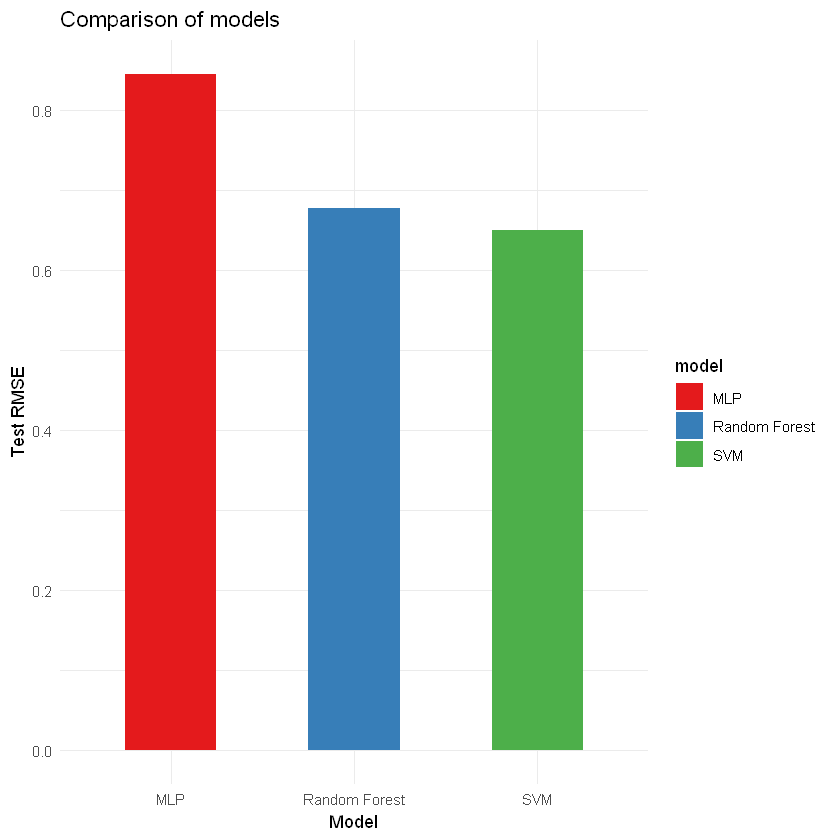

In [111]:
find_best_model_1()


We see that the best model is the svm with the following hyperparameters: gamma=0.1 and cost=1 with a test_rmse of 0.650557.

## 3. Learning procedure

For the learning procedure, we had to choose one using other R packages than the ones listed in Section 5 of the project. The learning model can be a deep learning model, a gradient boosting regressor tree or a feature selection strategy.

Here, we list several packages that we could use for this task:

1. **Deep Learning Packages**:
    - **H2O**: An open-source platform for machine learning.
    - **kernLab**: Kernel-based machine learning methods.
    - **neuralnet**: Training neural networks.
    - **nnet**: Feed-forward neural networks.


2. **Gradient Boosting Packages**:
    - **XGBoost** (Extreme Gradient Boosting)
    - **AdaBoost** (Adaptive Boosting)
    - **CatBoost**: Optimized for categorical features.
    - **GBM** (Gradient Boosting Machine)
    - **LightGBM** (Light Gradient Boosting Machine)



We opted for XGBoost due to its numerous advantages. Known for its efficiency and performance, XGBoost is well-suited for managing large datasets. It includes regularization parameters (L1 and L2) that help prevent overfitting, leading to improved generalization. Additionally, XGBoost is really fast for training.

In [112]:
nmse <- function(preds, labels) {
    errors <- (preds - labels)^2
    nmse <- mean(errors) / var(labels)
    return(list(metric = "NMSE", value = nmse))
}

rmse <- function(preds, labels) {
    rmse <- sqrt(mean((preds - labels)^2))
    return(list(metric = "RMSE", value = rmse))
}

time <- function() {
    return(format(Sys.time(), "%Y-%m-%d %H:%M:%S"))
}


### 3.1 XGBoost

#### 3.1.1 Cross-validation

We will do 10-fold cross-validation with XGBoost:

In [113]:
cross_validation_xgboost <- function(k, gamma, max_depth, nround, verbose = FALSE) {
    df <- data_preprocessing_pipeline(TRAIN_PATH)
    folds <- compute_folds(df, k)
    cv_fold_df <- data.frame(fold = numeric(), cv_train_nmse = numeric(), cv_train_rmse = numeric(), cv_test_nmse = numeric(), cv_test_rmse = numeric())
    cv_df <- data.frame(train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

    for (i in 1:k) {
        if (verbose) {
            cat("Computing for fold", i, "...\n")
        }
        fold <- folds[[i]]
        train_data <- df[-fold, ]
        X_train <- as.matrix(train_data[, setdiff(names(train_data), "target")]) # XGBoost requires matrix
        y_train <- train_data[, "target"]

        test_data <- df[fold, ]
        X_test <- as.matrix(test_data[, setdiff(names(test_data), "target")]) # XGBoost requires matrix
        y_test <- test_data[, "target"]

        xgboost_model <- xgboost(data = X_train, label = y_train, gamma = gamma, max_depth = max_depth, nround = nround, verbose = verbose)

        cv_train_fold_nmse <- mean((y_train - predict(xgboost_model, X_train))^2) / mean((y_train - mean(y_train))^2)
        cv_train_fold_rmse <- sqrt(mean((y_train - predict(xgboost_model, X_train))^2))
        cv_test_fold_nmse <- mean((y_test - predict(xgboost_model, X_test))^2) / mean((y_test - mean(y_test))^2)
        cv_test_fold_rmse <- sqrt(mean((y_test - predict(xgboost_model, X_test))^2))

        cv_fold_df <- rbind(cv_fold_df, data.frame(fold = i, cv_train_nmse = cv_train_fold_nmse, cv_train_rmse = cv_train_fold_rmse, cv_test_nmse = cv_test_fold_nmse, cv_test_rmse = cv_test_fold_rmse))
    }

    cv_df <- rbind(cv_df, data.frame(train_nmse = mean(cv_fold_df$cv_train_nmse), train_rmse = mean(cv_fold_df$cv_train_rmse), test_nmse = mean(cv_fold_df$cv_test_nmse), test_rmse = mean(cv_fold_df$cv_test_rmse)))
    return(cv_df)
}


In [114]:
# df <- cross_validation_xgboost(k = 10, gamma = 0, max_depth = 10, nround = 100) # For test
# head(df)


#### 3.1.2 Grid search for XGBoost

 We consider the following hyperparameters for the grid search: the minimum loss reduction required to make a further partition on a leaf node of the tree (gamma), the maximum depth of each tree (max_depth) and finally the number of boosting rounds (nround)

In [115]:
grid_search_xgboost <- function(option) {
    if (option == "compute") {
        k <- 10
        gammas <- c(0, 5, 10)
        max_depths <- c(3, 6, 9)
        nrounds <- c(100, 200, 300)

        grid_search_df <- data.frame(gamma = numeric(), max_depth = numeric(), nround = numeric(), train_nmse = numeric(), train_rmse = numeric(), test_nmse = numeric(), test_rmse = numeric())

        best_gamma <- NULL
        best_max_depth <- NULL
        best_nround <- NULL
        best_test_rmse <- Inf

        for (gamma in gammas) {
            for (max_depth in max_depths) {
                for (nround in nrounds) {
                    cat("[INFO] -", time(), "-", "Evaluating model with parameters:", "gamma =", gamma, ", max_depth =", max_depth, ", nround =", nround, "\n")
                    flush.console()
                    cv_df <- cross_validation_xgboost(k, gamma, max_depth, nround)
                    train_nmse <- cv_df$train_nmse
                    train_rmse <- cv_df$train_rmse
                    test_nmse <- cv_df$test_nmse
                    test_rmse <- cv_df$test_rmse

                    grid_search_df <- rbind(grid_search_df, data.frame(gamma = gamma, max_depth = max_depth, nround = nround, train_nmse = train_nmse, train_rmse = train_rmse, test_nmse = test_nmse, test_rmse = test_rmse))

                    if (test_rmse < best_test_rmse) {
                        best_gamma <- gamma
                        best_max_depth <- max_depth
                        best_nround <- nround
                        best_test_rmse <- test_rmse
                    }
                }
            }
        }

        write.csv(grid_search_df, file = "./results/grid_search_xgboost.csv", row.names = FALSE)
        cat("Best gamma:", best_gamma, "\n")
        cat("Best max depth:", best_max_depth, "\n")
        cat("Best nround:", best_nround, "\n")
        cat("Best RMSE:", best_test_rmse, "\n")
        return(grid_search_df)
    } else if (option == "load") {
        grid_search_df <- read.csv("./results/grid_search_xgboost.csv", stringsAsFactors = T)
        best_row <- grid_search_df %>% filter(test_rmse == min(test_rmse))
        cat("Best gamma:", best_row$gamma, "\n")
        cat("Best max depth:", best_row$max_depth, "\n")
        cat("Best nround:", best_row$nround, "\n")
        cat("Best RMSE:", best_row$test_rmse, "\n")
        return(grid_search_df)
    } else {
        stop("Incorrect option. Should be 'compute' to run the grid search or 'load' to load the results")
    }
}


The following cell takes a lot of times using the option `compute`, consider using the option `load` to get the results from `./results/grid_search_xgboost.csv`

In [116]:
df <- grid_search_xgboost("load") # or use "compute" option but takes a lot of time
df[order(df$test_rmse), ]


Best gamma: 0 
Best max depth: 6 
Best nround: 300 
Best RMSE: 0.5486233 


,gamma,max_depth,nround,train_nmse,train_rmse,test_nmse,test_rmse
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
6,0,6,300,0.045132994,0.21242812,0.3014570,0.5486233
5,0,6,200,0.072809277,0.26981522,0.3069626,0.5536553
9,0,9,300,0.001792782,0.04230783,0.3155783,0.5613768
8,0,9,200,0.006099093,0.07806457,0.3167951,0.5624498
7,0,9,100,0.025547729,0.15979670,0.3220010,0.5670548
4,0,6,100,0.134717257,0.36701352,0.3281780,0.5725168
3,0,3,300,0.238886481,0.48873965,0.3442900,0.5865388
2,0,3,200,0.285744634,0.53452069,0.3715401,0.6093461
18,5,9,300,0.209434716,0.45752066,0.3773741,0.6140821


### 3.2 Compare models and find the best one

Now we will compare our best model from section 2.4 and our XGBoost model:

In [117]:
find_best_model_2 <- function() {
    svm_results <- read.csv(GRID_SEARCH_SVM_PATH)
    xgboost_results <- read.csv(GRID_SEARCH_XGBOOST_PATH)

    best_svm <- svm_results %>% filter(test_rmse == min(test_rmse))
    best_xgboost <- xgboost_results %>% filter(test_rmse == min(test_rmse))

    print("SVM")
    print(best_svm)
    print("XGBoost")
    print(best_xgboost)

    best_results <- data.frame(model = c("SVM", "XGBoost"), test_rmse = c(best_svm$test_rmse, best_xgboost$test_rmse))
    best_model <- best_results %>% filter(test_rmse == min(test_rmse))

    plot <- ggplot(best_results, aes(x = model, y = test_rmse, fill = model)) +
        geom_bar(stat = "identity", width = 0.5) +
        theme_minimal() +
        labs(title = "Comparison of models", y = "RMSE", x = "Model") +
        scale_fill_brewer(palette = "Set1")
    print(plot)

    print("Best model")
    print(best_model)
}


[1] "SVM"
  kernel gamma cost train_nmse train_rmse test_nmse test_rmse
1 radial   0.1    1  0.2353263  0.4850882 0.4235913  0.650557
[1] "XGBoost"
  gamma max_depth nround train_nmse train_rmse test_nmse test_rmse
1     0         6    300 0.04513299  0.2124281  0.301457 0.5486233
[1] "Best model"
    model test_rmse
1 XGBoost 0.5486233


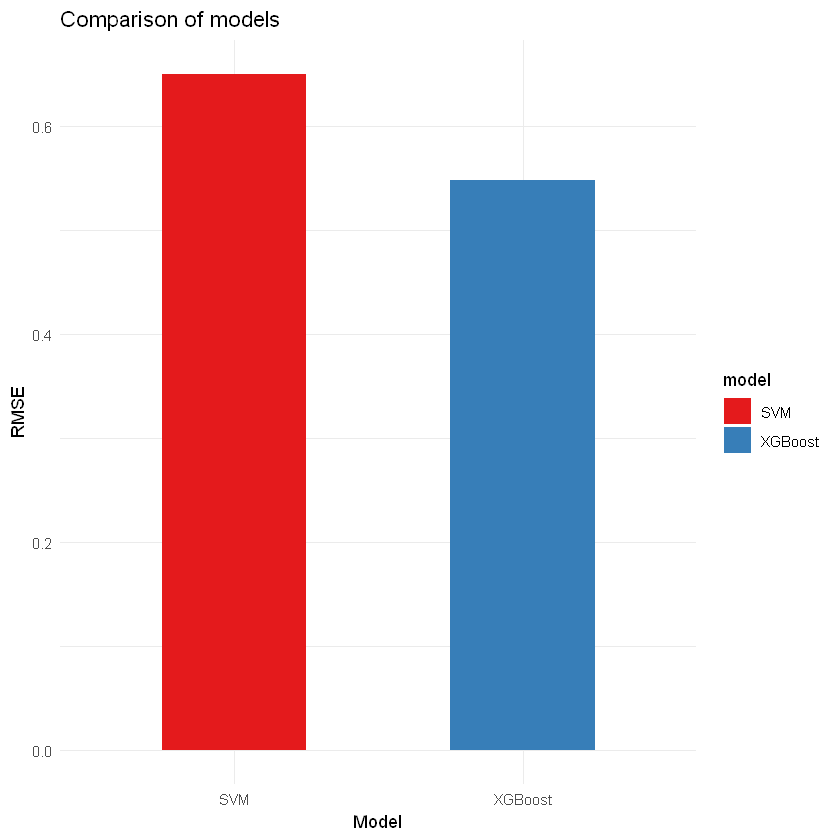

In [118]:
find_best_model_2()


We see that our XGBoost model is significantly better than SVM by achieving a lower RSME (0.5486233) on the test set than SVM. So we will keep our XGBoost model as our best model.

### 3.3 Train the best model and save it

Now that we found the best model, we can train it with the whole train set and with the best hyperparameters found and save it:

In [119]:
train_model <- function(path, verbose = FALSE) {
    train_data <- data_preprocessing_pipeline(TRAIN_PATH)
    gamma <- 0
    max_depth <- 6
    nround <- 300

    X_train <- as.matrix(train_data[, setdiff(names(train_data), "target")])
    y_train <- train_data[, "target"]

    cat("Training model ... \n")
    flush.console()

    xgboost_model <- xgboost(data = X_train, label = y_train, gamma = gamma, max_depth = max_depth, nround = nround, verbose = verbose)

    cat("Model trained successfully !\n")

    cat("Saving model ... \n")
    xgb.save(xgboost_model, path)
    cat("Model saved successfully !\n")

    return(xgboost_model)
}


In [120]:
# train_model(MODEL_PATH) # takes a lot of time


## 4. Compute predictions

Now that we found our best model, we can make our predictions. We will use our XGBoost model that we have trained and make our predictions.

In the following cell, we provide three options to make predictions:

1. **Train from scratch**: Train the model from scratch using the best hyperparameters, make predictions, and save them.
2. **Load trained model**: Load a previously trained model, make predictions, and save them.
3. **Load predictions**: Load existing predictions from a file.

Select one of the options by passing the corresponding string (`train`, `load_model`, `load_predictions`) to the `compute_predictions` function.

In [121]:
destandardize_predictions <- function(predictions) {
    test_data <- load_data(TEST_PATH)
    predictions <- data.frame(Place_ID.X.Date = test_data$Place_ID.X.Date, target = predictions)
    train_data <- first_pipeline(TRAIN_PATH)
    y_train <- train_data[, "target", drop = FALSE]
    mean_sd_y_train <- mean_sd(y_train)
    mu_train <- mean_sd_y_train["target", "mean"]
    sigma_train <- mean_sd_y_train["target", "sd"]
    predictions[, "target"] <- round((predictions[, "target"] * sigma_train) + mu_train)
    return(predictions)
}

save_predictions <- function(predictions, path) {
    write.csv(predictions, file = path, row.names = FALSE)
}

make_predictions <- function(model, path) {
    cat("Making predictions ...\n")
    flush.console()
    test_data <- data_preprocessing_pipeline(TEST_PATH)
    predictions <- predict(model, as.matrix(test_data))
    predictions <- destandardize_predictions(predictions)
    save_predictions(predictions, path)
    cat("Predictions saved successfully !\n")
    flush.console()
    return(predictions)
}

load_model <- function(path) {
    cat("Loading model ... \n")
    flush.console()
    model <- xgb.load(BEST_MODEL_PATH)
    cat("Model loaded successfully !\n")
    flush.console()
    return(model)
}

compute_predictions <- function(option) {
    if (option == "train") {
        model <- train_model(MODEL_PATH)
        predictions <- make_predictions(model, "submissions/predictions_1.csv")
        return(predictions)
    } else if (option == "load_model") {
        model <- load_model(BEST_MODEL_PATH)
        predictions <- make_predictions(model, "submissions/predictions_2.csv")
        return(predictions)
    } else if (option == "load_predictions") {
        predictions <- read.csv(SUBMISSION_PATH, stringsAsFactors = TRUE)
        return(predictions)
    } else {
        stop("Invalid option provided. Please provide one of: 'train', 'load_model', 'load_predictions'")
    }
}


Note that we consider the target as integers since there are just float numbers with 0 decimals.

In [122]:
predictions <- compute_predictions("load_predictions") # or use "load_model" option to load the model and do the predictions. "train" takes a lot of time.
predictions


Place_ID.X.Date,target
<fct>,<int>
0OS9LVX X 2020-01-02,57
0OS9LVX X 2020-01-03,40
0OS9LVX X 2020-01-04,57
0OS9LVX X 2020-01-05,35
0OS9LVX X 2020-01-06,48
0OS9LVX X 2020-01-07,56
0OS9LVX X 2020-01-08,59
0OS9LVX X 2020-01-09,65
0OS9LVX X 2020-01-10,45


Now the predictions should be available in the folder `./submissions/`. You can submit them via the Zindi website to know your score. With our submission available in `./submissions/submission.csv`, we scored 35.049 and ranked 173 on the leaderboard as shown here: ![image](./images/leaderboard.png)

## 5. Ranking of features

Using our best regression model so far, we return here a ranking of the features in terms of predictive power. The predictive power of the $i$ th feature is computed as the conditional information of $x_{i}$ about the target $y$ given the set of all the other features (denoted by $X^{−i}$):

\begin{equation}
I(x_i ; y | X^{-i}) = H(y | X^{-i}) - H(y | X)
\end{equation}

where $H(y | x)$ is the conditional entropy of $y$ given $x$ defined by:

\begin{equation}
H(y | x) = E_{x,y}[− log(p(y | x))]
\end{equation}

Since this is a regression task, we can use the cross-validation error of our best model as a reasonable estimation of the conditional entropy.

In [123]:
train_test_split <- function(data, ratio) {
    set.seed(SEED)
    num_test <- floor(nrow(data) * (1 - ratio))
    test_indices <- sample(nrow(data), num_test)
    data_train <- data[-test_indices, ]
    data_test <- data[test_indices, ]
    return(list(train = data_train, test = data_test))
}

estimate_conditional_entropy <- function(model, data, target) {
    estimated_conditional_entropy <- sqrt(mean((target - predict(model, data))^2))
    return(estimated_conditional_entropy)
}

ranking_features <- function(option) {
    if (option == "compute") {
        train_data <- data_preprocessing_pipeline(TRAIN_PATH, n_features = 10)
        train_test_data <- train_test_split(train_data, 0.8)
        train <- train_test_data$train
        X_train <- as.matrix(train[, setdiff(colnames(train), "target")])
        y_train <- train$target

        test <- train_test_data$test
        X_test <- as.matrix(test[, setdiff(colnames(test), "target")])
        y_test <- test$target

        gamma <- 0
        max_depth <- 6
        nround <- 300

        # Train the model with 10 features
        model <- xgboost(data = X_train, label = y_train, gamma = gamma, max_depth = max_depth, nround = nround, verbose = FALSE)

        ranked_features <- data.frame(feature = factor(colnames(X_train)), predictive_power = numeric(length(colnames(X_train))))

        # Calculate H(y|X)
        H_y_given_X <- estimate_conditional_entropy(model, X_test, y_test)
        cat(paste("H(y|X):", H_y_given_X), "\n")
        flush.console()

        # Calculate H(y|X_i) for each feature
        feature_count <- length(colnames(X_train))
        feature_index <- 1
        cat("Computing predictive power for each feature...\n")
        flush.console()
        for (feature in colnames(X_train)) {
            cat(sprintf("Processing feature: %s (%d/%d)\n", feature, feature_index, feature_count))
            flush.console()
            reduced_X_train <- as.matrix(X_train[, setdiff(colnames(X_train), feature)])
            reduced_X_test <- as.matrix(X_test[, setdiff(colnames(X_test), feature)])

            model <- xgboost(data = reduced_X_train, label = y_train, gamma = gamma, max_depth = max_depth, nround = nround, verbose = FALSE)

            H_y_given_X_minus_i <- estimate_conditional_entropy(model, reduced_X_test, y_test)
            predictive_power <- H_y_given_X_minus_i - H_y_given_X
            ranked_features$predictive_power[ranked_features$feature == feature] <- predictive_power
            feature_index <- feature_index + 1
        }

        # Rank features based on predictive power
        cat("Ranking features based on predictive power...\n")
        ranked_features <- ranked_features %>% arrange(desc(predictive_power))

        # Save the ranked features to a CSV file
        cat("Saving ranked features to CSV file...\n")
        write.csv(ranked_features, "./results/ranked_features_1.csv", row.names = FALSE)
        cat("Ranking of features completed successfully !.\n")

        return(ranked_features)
    } else if (option == "load") {
        cat("Loading ranked features from CSV file...\n")
        ranked_features <- load_data(RANKED_FEATURES_PATH)
        cat("Ranked features loaded successfully !\n")
        return(ranked_features)
    } else {
        stop("Invalid case provided. Please provide one of: 'compute', 'load'")
    }
}

plot_ranked_features <- function(ranked_features) {
    options(repr.plot.width = 15, repr.plot.height = 15)
    ranked_features$feature <- factor(ranked_features$feature, levels = ranked_features$feature[order(ranked_features$predictive_power, decreasing = TRUE)])
    ggplot(ranked_features, aes(y = feature, x = predictive_power)) +
        geom_bar(stat = "identity", fill = "skyblue") +
        labs(title = "Ranking of the features in terms of predictive power", x = "Predictive power", y = "Features") +
        theme_minimal()
}


You can either compute from scratch or load the ranked features we previously computed:

In [124]:
ranked_features <- ranking_features("load") # or "compute" to compute from scratch but takes long time


Loading ranked features from CSV file...
Ranked features loaded successfully !


Here, we plot the ranking of the features in terms of predictive power:

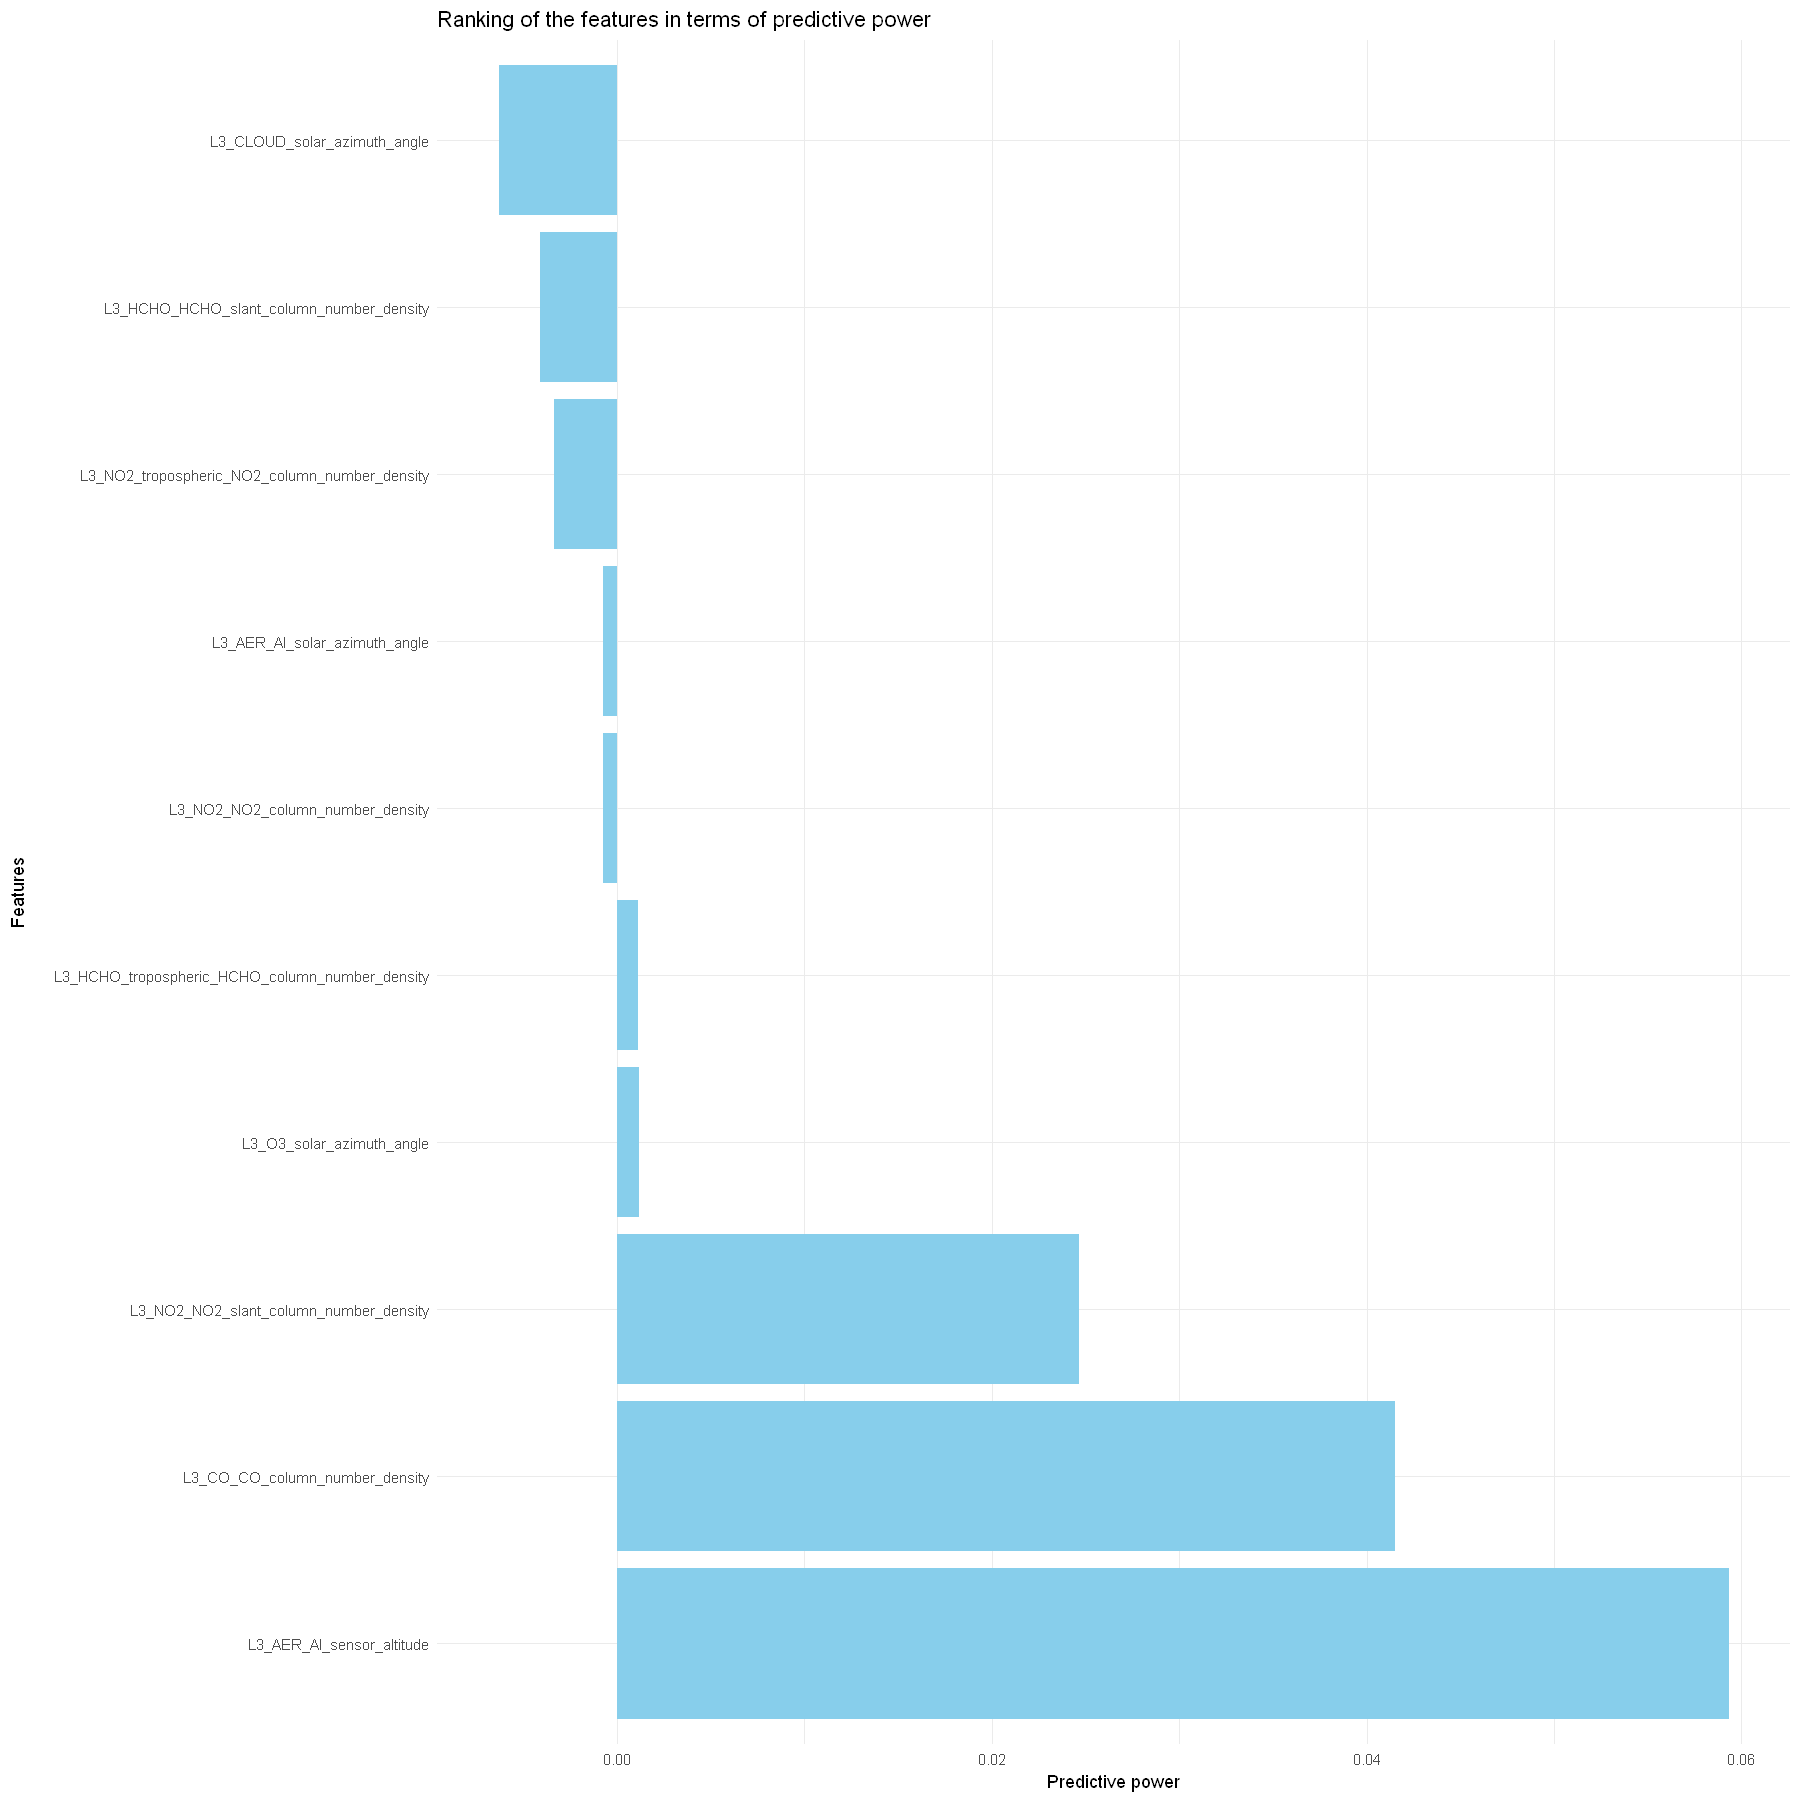

In [125]:
plot_ranked_features(ranked_features)


Here, we show the top 10 features in terms of predictive power:

In [126]:
ranked_features


feature,predictive_power
<fct>,<dbl>
L3_AER_AI_sensor_altitude,0.0593270112
L3_CO_CO_column_number_density,0.0414956176
L3_NO2_NO2_slant_column_number_density,0.0246692064
L3_O3_solar_azimuth_angle,0.0011664073
L3_HCHO_tropospheric_HCHO_column_number_density,0.0011592207
L3_NO2_NO2_column_number_density,-0.0007184055
L3_AER_AI_solar_azimuth_angle,-0.0007424356
L3_NO2_tropospheric_NO2_column_number_density,-0.0033292372
L3_HCHO_HCHO_slant_column_number_density,-0.0040688666


## 6. Conclusion

In this project, we implemented several techniques:

For data preprocessing pipeline, we analyzed the train and test sets and implemented feature engineering and feature selection. For feature selection, we tested various filter methods such as correlation, mRMR and PCA and did a cross validation to find the best feature selection method.

For model validation and selection, we trained various models such as Random Forest, SVM, MLP, and XGBoost. Using grid search and cross-validation techniques, we tuned hyperparameters and selected the best model. We evaluated models based on performance metrics such as RMSE and chosed the best model based on its validation data performance.

With the selected model, we made predictions on the test dataset. We finally made a ranking of features for the 10 most relevant features in terms of predictive power.